# Create comparison plots of multiple well single wavelength and single well single wavelength data for WT and mutant proteins

In [1]:
# import libraries and packages

import os
import numpy as np
from assaytools import parser
import string
from glob import glob

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set(style='white')
sns.set_context('talk')

In [2]:
#### load data files for 4 multiple well experiments and 1 single well experiment

# files for multi-well

xml_files_Abl = ['infinite_results/multi_well_Abl/Abl_Bos_NB_20190710_111828.xml',
                 'infinite_results/multi_well_Abl/Abl_Bos_Iso_NB_20190710_113155.xml',
                 'infinite_results/multi_well_Abl/Abl_Erl_NB_20190710_114526.xml',
                 'infinite_results/multi_well_Abl/Abl_Gef_NB_20190710_115855.xml']

xml_files_Src = ['infinite_results/multi_well_Src/Src_Bos_NB_20190710_135049.xml',
                 'infinite_results/multi_well_Src/Src_Bos_Iso_NB_20190710_140416.xml',
                 'infinite_results/multi_well_Src/Src_Erl_NB_20190710_141748.xml',
                 'infinite_results/multi_well_Src/Src_Gef_NB_20190710_143120.xml']

xml_files_Abl_GK = ['infinite_results/multi_well_Abl_T334I/Abl_D382N_T334I_Bos_NB_20190715_161412.xml',
                    'infinite_results/multi_well_Abl_T334I/Abl_D382N_T334I_Bos_Iso_NB_20190715_162627.xml',
                    'infinite_results/multi_well_Abl_T334I/Abl_D382N_T334I_Erl_NB_20190715_164047.xml',
                    'infinite_results/multi_well_Abl_T334I/Abl_D382N_T334I_Gef_NB_20190715_165326.xml']

xml_files_Src_GK = ['infinite_results/multi_well_Src_T338I/Src_T338I_Bos_NB_20190715_125826.xml',
                    'infinite_results/multi_well_Src_T338I/Src_T338I_Bos_Iso_NB_20190715_131151.xml',
                    'infinite_results/multi_well_Src_T338I/Src_T338I_Erl_NB_20190715_132525.xml',
                    'infinite_results/multi_well_Src_T338I/Src_T338I_Gef_NB_20190715_133852.xml']


# files for single-well

xml_files_single_well = ['infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GK_conc_0_20190307_111234.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GK_conc_1_20190307_112351.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_2_20190307_113345.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_3_20190307_114336.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_4_20190307_115329.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_5_20190307_120322.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_6_20190307_121315.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_7_20190307_122657.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_8_20190307_123649.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_9_20190307_124642.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_10_20190307_125635.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_11_20190307_130625.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_12_20190307_131618.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_13_20190307_132611.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_14_20190307_133612.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_15_20190307_134607.xml',
             'infinite_results/single_well_all/p38_Abl_WT_GK_Src_WT_GKconc_16_20190307_135607.xml']

In [3]:
### create ligand concentration arrays 

# multi-well had 12 concentration points

ligand_conc_12 = [ 0.00000000e+00, 8.00000000e-09, 1.74937932e-08, 3.82541000e-08,
                           8.36511642e-08, 1.82922021e-07, 4.00000000e-07, 8.74689659e-07,
                           1.91270500e-06, 4.18255821e-06, 9.14610104e-06, 2.00000000e-05 ]

ligand_conc_12 = np.flip(ligand_conc_12, axis=0)

# single-well had 17 concentration points

ligand_conc_17 = [  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05]

In [4]:
def inputs_multi(xml_files, sample_name, prot_wells, buff_wells):
    return({
#     'single_well'   :  single,
    'xml_files'     :  xml_files,
    'file_set'      :  {sample_name: xml_files},
    'protein_wells'  :  {sample_name: prot_wells},
    'ligand_order'  :  ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib'],
    'buffer_wells'   :  {sample_name: buff_wells},
    'section'       :  '280_480_TOP_100',
    'wavelength'    :  '480',
    'Lstated'       :  np.array(ligand_conc_12, np.float64), # ligand concentration
    'Pstated'       :  0.5 * np.ones([12],np.float64), # protein concentration, M
    'assay_volume'  :  100e-6, # assay volume, L
    'well_area'     :  0.3969, # well area, cm^2 for 4ti-0203 [http://4ti.co.uk/files/3113/4217/2464/4ti-0201.pdf]
    })

def inputs_single(xml_files, sample_name, prot_wells, buff_wells):
    return({
    'single_well'   :  True,
    'xml_files'     :  xml_files,
    'file_set'      :  {sample_name: xml_files},
    'protein_wells'  :  {sample_name: prot_wells},
    'ligand_order'  :  ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib'],
    'buffer_wells'   :  {sample_name: buff_wells},
    'section'       :  'ex280_em480_top_gain100',
    'wavelength'    :  '480',
    'Lstated'       :  np.array(ligand_conc_17, np.float64), # ligand concentration
    'Pstated'       :  0.5 * np.ones([17],np.float64), # protein concentration, M
    'assay_volume'  :  100e-6, # assay volume, L
    'well_area'     :  0.3969, # well area, cm^2 for 4ti-0203 [http://4ti.co.uk/files/3113/4217/2464/4ti-0201.pdf]
    })

In [ ]:
def plot(color, inputs, complex_fluo, complex_1, ligand_fluo, complex_2, complex_3, complex_4, protein, assay_type):
    cols = sns.color_palette('%s_r' % color, 5)

    fig, ax = plt.subplots(figsize=(8,4))

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_1]/complex_fluo[complex_1].max(),marker='o',color=cols[0],label='Bosutinib')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_1]/complex_fluo[complex_1].max(),linestyle='--',color=cols[0])

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_2]/complex_fluo[complex_2].max(),marker='o',color=cols[1],label='Bosutinib Isomer')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_2]/complex_fluo[complex_2].max(),linestyle='--',color=cols[1])

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_3]/complex_fluo[complex_3].max(),marker='o',color=cols[2],label='Erlotinib')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_3]/complex_fluo[complex_3].max(),linestyle='--',color=cols[2])

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_4]/complex_fluo[complex_4].max(),marker='o',color=cols[3],label='Gefitinib')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_4]/complex_fluo[complex_4].max(),linestyle='--',color=cols[3])


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title('%s, %s' %(protein, assay_type),fontsize=20)
    plt.yticks([])
    plt.ylabel('Normalized Fluorescence',fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlabel('$[L] (M)$',fontsize=16)
    plt.legend(loc=2)

    plt.tight_layout()

    plt.savefig('%s_binding_curve_%s.pdf' %(protein, assay_type))

In [ ]:
def plot_raw(color, inputs, complex_fluo, complex_1, ligand_fluo, complex_2, complex_3, complex_4, protein, assay_type):
    cols = sns.color_palette('%s_r' % color, 5)

    fig, ax = plt.subplots(figsize=(8,4))

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_1],marker='o',color=cols[0],label='Bosutinib')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_1],linestyle='--',color=cols[0])

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_2],marker='o',color=cols[1],label='Bosutinib Isomer')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_2],linestyle='--',color=cols[1])

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_3],marker='o',color=cols[2],label='Erlotinib')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_3],linestyle='--',color=cols[2])

    plt.semilogx(inputs['Lstated'],complex_fluo[complex_4],marker='o',color=cols[3],label='Gefitinib')
    plt.semilogx(inputs['Lstated'],ligand_fluo[complex_4],linestyle='--',color=cols[3])


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title('%s, %s, raw rfu values' %(protein, assay_type),fontsize=20)
    plt.ylabel('Fluorescence (rfu)',fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlabel('$[L] (M)$',fontsize=16)
    plt.legend(loc=2)

    plt.tight_layout()

    plt.savefig('%s_raw_binding_curve_%s.pdf' %(protein, assay_type))

In [ ]:
# def plot_overlay(color, inputs_multi, inputs_single, complex_fluo_multi, complex_1_multi, complex_fluo_single, complex_1_single, 
#                  ligand_fluo_multi, ligand_fluo_single, complex_2_multi, complex_2_single, complex_3_multi, complex_3_single, complex_4_multi, 
#                  complex_4_single, protein):
    
#     cols = sns.color_palette('%s_r' % color, 5)

#     fig, ax = plt.subplots(figsize=(8,4))

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_1_multi]/complex_fluo_multi[complex_1_multi].max(),marker='o',color=cols[0],label='Bosutinib multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_1_multi]/complex_fluo_multi[complex_1_multi].max(),linestyle='--',color=cols[0])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_1_single]/complex_fluo_single[complex_1_single].max(),marker='s',color=cols[0],label='Bosutinib single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_1_single]/complex_fluo_single[complex_1_single].max(),linestyle='-.',color=cols[0])

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_2_multi]/complex_fluo_multi[complex_2_multi].max(),marker='o',color=cols[1],label='Bosutinib Isomer multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_2_multi]/complex_fluo_multi[complex_2_multi].max(),linestyle='--',color=cols[1])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_2_single]/complex_fluo_single[complex_2_single].max(),marker='s',color=cols[1],label='Bosutinib Isomer single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_2_single]/complex_fluo_single[complex_2_single].max(),linestyle='-.',color=cols[1])

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_3_multi]/complex_fluo_multi[complex_3_multi].max(),marker='o',color=cols[2],label='Erlotinib multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_3_multi]/complex_fluo_multi[complex_3_multi].max(),linestyle='--',color=cols[2])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_3_single]/complex_fluo_single[complex_3_single].max(),marker='s',color=cols[2],label='Erlotinib single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_3_single]/complex_fluo_single[complex_3_single].max(),linestyle='-.',color=cols[2])

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_4_multi]/complex_fluo_multi[complex_4_multi].max(),marker='o',color=cols[3],label='Gefitinib multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_4_multi]/complex_fluo_multi[complex_4_multi].max(),linestyle='--',color=cols[3])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_4_single]/complex_fluo_single[complex_4_single].max(),marker='s',color=cols[3],label='Gefitinib single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_4_single]/complex_fluo_single[complex_4_single].max(),linestyle='-.',color=cols[3])


#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

#     plt.title('%s overlay' %(protein),fontsize=20)
#     plt.yticks([])
#     plt.ylabel('Normalized Fluorescence',fontsize=16)
#     plt.xticks(fontsize=16)
#     plt.xlabel('$[L] (M)$',fontsize=16)
#     plt.legend(loc=2,fontsize=10)

#     plt.tight_layout()

#     plt.savefig('%s_binding_curve_overlay.pdf' %(protein))

In [ ]:
# def plot_raw_overlay(color, inputs_multi, inputs_single, complex_fluo_multi, complex_1_multi, complex_fluo_single, complex_1_single, 
#                  ligand_fluo_multi, ligand_fluo_single, complex_2_multi, complex_2_single, complex_3_multi, complex_3_single, complex_4_multi, 
#                  complex_4_single, protein, assay_type):
    
#     cols = sns.color_palette('%s_r' % color, 5)

#     fig, ax = plt.subplots(figsize=(8,4))

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_1_multi],marker='o',color=cols[0],label='Bosutinib multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_1_multi],linestyle='--',color=cols[0])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_1_single],marker='s',color=cols[0],label='Bosutinib single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_1_single],linestyle='-.',color=cols[0])

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_2_multi],marker='o',color=cols[1],label='Bosutinib Isomer multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_2_multi],linestyle='--',color=cols[1])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_2_single],marker='s',color=cols[1],label='Bosutinib Isomer single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_2_single],linestyle='-.',color=cols[1])

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_3_multi],marker='o',color=cols[2],label='Erlotinib multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_3_multi],linestyle='--',color=cols[2])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_3_single],marker='s',color=cols[2],label='Erlotinib single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_3_single],linestyle='-.',color=cols[2])

#     plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_4_multi],marker='o',color=cols[3],label='Gefitinib multi')
#     plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_4_multi],linestyle='--',color=cols[3])
#     plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_4_single],marker='s',color=cols[3],label='Gefitinib single')
#     plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_4_single],linestyle='-.',color=cols[3])


#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

#     plt.title('%s, %s' %(protein, assay_type),fontsize=20)
#     plt.yticks([])
#     plt.ylabel('Normalized Fluorescence',fontsize=16)
#     plt.xticks(fontsize=16)
#     plt.xlabel('$[L] (M)$',fontsize=10)
#     plt.legend(loc=2, fontsize=10)

#     plt.tight_layout()

#     plt.savefig('%s_raw_binding_curve_overlay.pdf' %(protein))

### Abl D382N multi-well

In [5]:
inputs_Abl_multi = inputs_multi(xml_files=xml_files_Abl, sample_name='Abl', prot_wells=['A1','C1','E1','G1'], 
                    buff_wells=['B1','D1','F1','H1'])

In [6]:
[complex_fluorescence_Abl_multi, ligand_fluorescence_Abl_multi] = parser.get_data_using_inputs(inputs_Abl_multi)

print('complex_fluorescence:\n', complex_fluorescence_Abl_multi)
print('ligand_fluorescence:\n', ligand_fluorescence_Abl_multi)

Skipping analysis of rows:  []
complex_fluorescence:
 {'Abl-Bosutinib-AB': array([48665., 46957., 47346., 46960., 47674., 39713., 21743., 12046.,
        7606.,  5666.,  4610.,  3806.]), 'Abl-Bosutinib Isomer-CD': array([48288., 40646., 39337., 37855., 38919., 33381., 18174., 10540.,
        6768.,  5248.,  4464.,  3766.]), 'Abl-Erlotinib-EF': array([47192., 41955., 39590., 37241., 33307., 25280., 15498.,  9423.,
        6378.,  4994.,  4323.,  3719.]), 'Abl-Gefitinib-GH': array([36323., 29888., 20533., 15999., 13702.,  9641.,  6836.,  5175.,
        4524.,  4057.,  3887.,  3762.])}
ligand_fluorescence:
 {'Abl-Bosutinib-AB': array([10410.,  5940.,  4496.,  3943.,  3570.,  3448.,  3362.,  3413.,
        3377.,  3331.,  3415.,  3373.]), 'Abl-Bosutinib Isomer-CD': array([22430.,  8534.,  5798.,  4241.,  3702.,  3652.,  3474.,  3378.,
        3168.,  3346.,  3291.,  3264.]), 'Abl-Erlotinib-EF': array([9145., 8144., 4243., 3564., 3380., 3272., 3317., 3321., 3241.,
       3217., 3304., 3316.

In [ ]:
Abl_multi_plot = plot(color='YlOrBr', inputs=inputs_Abl_multi, complex_fluo=complex_fluorescence_Abl_multi, 
                      complex_1='Abl-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Abl_multi, 
                      complex_2='Abl-Bosutinib Isomer-CD', complex_3='Abl-Erlotinib-EF', complex_4='Abl-Gefitinib-GH',
                      protein='Abl', assay_type='multiple well')


In [ ]:
Abl_multi_raw_plot = plot_raw(color='YlOrBr', inputs=inputs_Abl_multi, complex_fluo=complex_fluorescence_Abl_multi, 
                      complex_1='Abl-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Abl_multi, 
                      complex_2='Abl-Bosutinib Isomer-CD', complex_3='Abl-Erlotinib-EF', complex_4='Abl-Gefitinib-GH',
                      protein='Abl', assay_type='multiple well')

### Abl D382N/T334I multi well

In [7]:
inputs_Abl_T334I_multi = inputs_multi(xml_files=xml_files_Abl_GK, sample_name='Abl T334I', 
                                      prot_wells=['A1','C1','E1','G1'], buff_wells=['B1','D1','F1','H1'])

In [8]:
[complex_fluorescence_Abl_T334I_multi, ligand_fluorescence_Abl_T334I_multi] = parser.get_data_using_inputs(inputs_Abl_T334I_multi)

print('complex_fluorescence:\n', complex_fluorescence_Abl_T334I_multi)
print('ligand_fluorescence:\n', ligand_fluorescence_Abl_T334I_multi)

Skipping analysis of rows:  []
complex_fluorescence:
 {'Abl T334I-Bosutinib-AB': array([31639., 28991., 26927., 26929., 26531., 23721., 13508.,  8641.,
        5904.,  4790.,  4190.,  3816.]), 'Abl T334I-Bosutinib Isomer-CD': array([30268., 23485., 22101., 20955., 20177., 19166., 11505.,  7386.,
        5415.,  4534.,  4050.,  3658.]), 'Abl T334I-Erlotinib-EF': array([37960., 32602., 28602., 26561., 24477., 18467., 11744.,  7582.,
        5595.,  4545.,  4030.,  3620.]), 'Abl T334I-Gefitinib-GH': array([33482., 27907., 22206., 16311., 11535.,  7545.,  5598.,  4503.,
        4046.,  3944.,  3605.,  3543.])}
ligand_fluorescence:
 {'Abl T334I-Bosutinib-AB': array([13014.,  7256.,  4906.,  4015.,  3632.,  3549.,  3349.,  3374.,
        3411.,  3442.,  3464.,  3325.]), 'Abl T334I-Bosutinib Isomer-CD': array([21673.,  8517.,  6049.,  4397.,  3796.,  3698.,  3428.,  3241.,
        3302.,  3244.,  3299.,  3241.]), 'Abl T334I-Erlotinib-EF': array([10359.,  8105.,  4121.,  3628.,  3335.,  3233.,

In [ ]:
Abl_T334I_multi_plot = plot(color='YlOrBr', inputs=inputs_Abl_T334I_multi, complex_fluo=complex_fluorescence_Abl_T334I_multi, 
                      complex_1='Abl T334I-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Abl_T334I_multi, 
                      complex_2='Abl T334I-Bosutinib Isomer-CD', complex_3='Abl T334I-Erlotinib-EF', complex_4='Abl T334I-Gefitinib-GH',
                      protein='Abl T334I', assay_type='multiple well')

In [ ]:
Abl_T334I_multi_plot = plot_raw(color='YlOrBr', inputs=inputs_Abl_T334I_multi, complex_fluo=complex_fluorescence_Abl_T334I_multi, 
                      complex_1='Abl T334I-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Abl_T334I_multi, 
                      complex_2='Abl T334I-Bosutinib Isomer-CD', complex_3='Abl T334I-Erlotinib-EF', complex_4='Abl T334I-Gefitinib-GH',
                      protein='Abl T334I', assay_type='multiple well')

### Abl D382N single-well

In [9]:
inputs_Abl_single = inputs_single(xml_files=xml_files_single_well, sample_name='Abl', prot_wells=['B1','D1','F1','H1'], 
                    buff_wells=['A2', 'C2', 'E2', 'G2'])

In [10]:
[complex_fluorescence_Abl_single, ligand_fluorescence_Abl_single] = parser.get_data_using_inputs(inputs_Abl_single)

print('complex_fluorescence:\n', complex_fluorescence_Abl_single)
print('ligand_fluorescence:\n', ligand_fluorescence_Abl_single)

complex_fluorescence:
 {'Abl-Bosutinib-B1A2': array([ 3003.,  3620.,  3875.,  4515.,  5651.,  7544., 10571., 15090.,
       23579., 24326., 23623., 23445., 23209., 24465., 26940., 32493.,
       44901.]), 'Abl-Bosutinib Isomer-D1C2': array([ 2983.,  3541.,  3738.,  4246.,  5241.,  6880.,  9467., 13390.,
       20298., 21404., 21485., 22127., 23194., 25811., 30355., 38458.,
       53950.]), 'Abl-Erlotinib-F1E2': array([ 3026.,  3622.,  3858.,  4233.,  5012.,  6263.,  8123., 10160.,
       14240., 17024., 18379., 19295., 20389., 22225., 25822., 32043.,
       42751.]), 'Abl-Gefitinib-H1G2': array([ 3071.,  3169.,  3174.,  3254.,  3379.,  3681.,  4091.,  4309.,
        5828.,  7218.,  8934., 10993., 13151., 16209., 20269., 26613.,
       36825.])}
ligand_fluorescence:
 {'Abl-Bosutinib-B1A2': array([ 2617.,  2663.,  2611.,  2601.,  2556.,  2611.,  2650.,  2662.,
        2833.,  3042.,  3366.,  3965.,  4994.,  6996., 10600., 17615.,
       31184.]), 'Abl-Bosutinib Isomer-D1C2': array([ 2619

In [ ]:
Abl_single_plot = plot(color='YlOrBr', inputs=inputs_Abl_single, complex_fluo=complex_fluorescence_Abl_single, 
                      complex_1='Abl-Bosutinib-B1A2', ligand_fluo=ligand_fluorescence_Abl_single, 
                      complex_2='Abl-Bosutinib Isomer-D1C2', complex_3='Abl-Erlotinib-F1E2', complex_4='Abl-Gefitinib-H1G2',
                      protein='Abl', assay_type='single well')

In [ ]:
Abl_single_plot = plot_raw(color='YlOrBr', inputs=inputs_Abl_single, complex_fluo=complex_fluorescence_Abl_single, 
                      complex_1='Abl-Bosutinib-B1A2', ligand_fluo=ligand_fluorescence_Abl_single, 
                      complex_2='Abl-Bosutinib Isomer-D1C2', complex_3='Abl-Erlotinib-F1E2', complex_4='Abl-Gefitinib-H1G2',
                      protein='Abl', assay_type='single well')

### Abl D382N/T334I single-well

In [11]:
inputs_Abl_T334I_single = inputs_single(xml_files=xml_files_single_well, sample_name='Abl T334I', prot_wells=['B4','D4','F4','H4'], 
                    buff_wells=['A2', 'C2', 'E2', 'G2'])

In [12]:
[complex_fluorescence_Abl_T334I_single, ligand_fluorescence_Abl_T334I_single] = parser.get_data_using_inputs(inputs_Abl_T334I_single)

print('complex_fluorescence:\n', complex_fluorescence_Abl_T334I_single)
print('ligand_fluorescence:\n', ligand_fluorescence_Abl_T334I_single)

complex_fluorescence:
 {'Abl T334I-Bosutinib-B4A2': array([ 2982.,  3382.,  3532.,  3911.,  5171.,  5795.,  7674., 10514.,
       14893., 15320., 15075., 16189., 16988., 18130., 21478., 28751.,
       43926.]), 'Abl T334I-Bosutinib Isomer-D4C2': array([ 2979.,  3250.,  3371.,  3659.,  4222.,  5125.,  6506.,  8796.,
       12016., 12641., 13060., 13965., 15432., 18455., 23810., 33331.,
       50950.]), 'Abl T334I-Erlotinib-F4E2': array([ 2952.,  3325.,  3440.,  3741.,  4370.,  5448.,  6970.,  8574.,
       11859., 13519., 14436., 15113., 15962., 17723., 20536., 25717.,
       33822.]), 'Abl T334I-Gefitinib-H4G2': array([ 3041.,  3099.,  3229.,  3239.,  3384.,  3613.,  3934.,  4104.,
        5226.,  6445.,  7971.,  9930., 12326., 15432., 19854., 26596.,
       37762.])}
ligand_fluorescence:
 {'Abl T334I-Bosutinib-B4A2': array([ 2617.,  2663.,  2611.,  2601.,  2556.,  2611.,  2650.,  2662.,
        2833.,  3042.,  3366.,  3965.,  4994.,  6996., 10600., 17615.,
       31184.]), 'Abl T334I-

In [ ]:
Abl_T334I_single_plot = plot(color='YlOrBr', inputs=inputs_Abl_T334I_single, complex_fluo=complex_fluorescence_Abl_T334I_single, 
                      complex_1='Abl T334I-Bosutinib-B4A2', ligand_fluo=ligand_fluorescence_Abl_T334I_single, 
                      complex_2='Abl T334I-Bosutinib Isomer-D4C2', complex_3='Abl T334I-Erlotinib-F4E2', complex_4='Abl T334I-Gefitinib-H4G2',
                      protein='Abl T334I', assay_type='single well')


In [ ]:
Abl_T334I_single_plot = plot_raw(color='YlOrBr', inputs=inputs_Abl_T334I_single, complex_fluo=complex_fluorescence_Abl_T334I_single, 
                      complex_1='Abl T334I-Bosutinib-B4A2', ligand_fluo=ligand_fluorescence_Abl_T334I_single, 
                      complex_2='Abl T334I-Bosutinib Isomer-D4C2', complex_3='Abl T334I-Erlotinib-F4E2', complex_4='Abl T334I-Gefitinib-H4G2',
                      protein='Abl T334I', assay_type='single well')

### Src multi-well

In [13]:
inputs_Src_multi = inputs_multi(xml_files=xml_files_Src, sample_name='Src', prot_wells=['A1','C1','E1','G1'], 
                    buff_wells=['B1','D1','F1','H1'])

In [14]:
[complex_fluorescence_Src_multi, ligand_fluorescence_Src_multi] = parser.get_data_using_inputs(inputs_Src_multi)

print('complex_fluorescence:\n', complex_fluorescence_Src_multi)
print('ligand_fluorescence:\n', ligand_fluorescence_Src_multi)

Skipping analysis of rows:  []
complex_fluorescence:
 {'Src-Bosutinib-AB': array([46938., 43756., 44370., 44195., 44018., 37351., 20480., 11706.,
        7325.,  5259.,  4287.,  3538.]), 'Src-Bosutinib Isomer-CD': array([45115., 36510., 34802., 32896., 31836., 25409., 15182.,  9237.,
        6060.,  4665.,  4024.,  3524.]), 'Src-Erlotinib-EF': array([32251., 27940., 25285., 20583., 15726., 10244.,  7043.,  5129.,
        4183.,  3870.,  3617.,  3423.]), 'Src-Gefitinib-GH': array([20644., 17200., 14031., 10596.,  8051.,  5689.,  4660.,  3987.,
        3779.,  3589.,  3500.,  3441.])}
ligand_fluorescence:
 {'Src-Bosutinib-AB': array([12520.,  6579.,  4592.,  4085.,  3578.,  3442.,  3369.,  3389.,
        3310.,  3511.,  3387.,  3444.]), 'Src-Bosutinib Isomer-CD': array([21541.,  8597.,  5709.,  4313.,  3721.,  3631.,  3395.,  3283.,
        3237.,  3223.,  3263.,  3347.]), 'Src-Erlotinib-EF': array([9114., 7621., 4185., 3616., 3324., 3285., 3334., 3291., 3299.,
       3291., 3260., 3364.

In [ ]:
Src_multi_plot = plot(color='YlGnBu', inputs=inputs_Src_multi, complex_fluo=complex_fluorescence_Src_multi, 
                      complex_1='Src-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Src_multi, 
                      complex_2='Src-Bosutinib Isomer-CD', complex_3='Src-Erlotinib-EF', complex_4='Src-Gefitinib-GH',
                      protein='Src', assay_type='multiple well')

In [ ]:
Src_multi_plot = plot_raw(color='YlGnBu', inputs=inputs_Src_multi, complex_fluo=complex_fluorescence_Src_multi, 
                      complex_1='Src-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Src_multi, 
                      complex_2='Src-Bosutinib Isomer-CD', complex_3='Src-Erlotinib-EF', complex_4='Src-Gefitinib-GH',
                      protein='Src', assay_type='multiple well')

### Src T338I multi-well

In [15]:
inputs_Src_T338I_multi = inputs_multi(xml_files=xml_files_Src_GK, sample_name='Src T338I', prot_wells=['A1','C1','E1','G1'], 
                    buff_wells=['B1','D1','F1','H1'])

In [16]:
[complex_fluorescence_Src_T338I_multi, ligand_fluorescence_Src_T338I_multi] = parser.get_data_using_inputs(inputs_Src_T338I_multi)

print('complex_fluorescence:\n', complex_fluorescence_Src_T338I_multi)
print('ligand_fluorescence:\n', ligand_fluorescence_Src_T338I_multi)

Skipping analysis of rows:  []
complex_fluorescence:
 {'Src T338I-Bosutinib-AB': array([29578., 26924., 26419., 25735., 23922., 18083., 10527.,  7088.,
        5363.,  4302.,  3965.,  3582.]), 'Src T338I-Bosutinib Isomer-CD': array([36943., 30433., 26797., 23358., 18442., 12347.,  7895.,  5513.,
        4566.,  3975.,  4013.,  3444.]), 'Src T338I-Erlotinib-EF': array([24637., 22227., 20265., 18049., 14228., 10021.,  6644.,  4996.,
        4165.,  3859.,  3599.,  3449.]), 'Src T338I-Gefitinib-GH': array([26367., 20518., 15785., 11161.,  7965.,  5638.,  4455.,  3950.,
        3805.,  3672.,  3688.,  3607.])}
ligand_fluorescence:
 {'Src T338I-Bosutinib-AB': array([9173., 5650., 4284., 3967., 3661., 3453., 3426., 3434., 3458.,
       3496., 3469., 3492.]), 'Src T338I-Bosutinib Isomer-CD': array([16648.,  7678.,  5256.,  4265.,  3806.,  3828.,  3419.,  3295.,
        3268.,  3256.,  3304.,  3324.]), 'Src T338I-Erlotinib-EF': array([7479., 7794., 3924., 3565., 3430., 3326., 3236., 3294., 326

In [ ]:
Src_T338I_multi_plot = plot(color='YlGnBu', inputs=inputs_Src_T338I_multi, complex_fluo=complex_fluorescence_Src_T338I_multi, 
                      complex_1='Src T338I-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Src_T338I_multi, 
                      complex_2='Src T338I-Bosutinib Isomer-CD', complex_3='Src T338I-Erlotinib-EF', complex_4='Src T338I-Gefitinib-GH',
                      protein='Src T338I', assay_type='multiple well')


In [ ]:
Src_T338I_multi_plot = plot_raw(color='YlGnBu', inputs=inputs_Src_T338I_multi, complex_fluo=complex_fluorescence_Src_T338I_multi, 
                      complex_1='Src T338I-Bosutinib-AB', ligand_fluo=ligand_fluorescence_Src_T338I_multi, 
                      complex_2='Src T338I-Bosutinib Isomer-CD', complex_3='Src T338I-Erlotinib-EF', complex_4='Src T338I-Gefitinib-GH',
                      protein='Src T338I', assay_type='multiple well')

### Src single-well

In [17]:
inputs_Src_single = inputs_single(xml_files=xml_files_single_well, sample_name='Src', prot_wells=['B7','D7','F7','H7'], 
                    buff_wells=['A2', 'C2', 'E2', 'G2'])

In [18]:
[complex_fluorescence_Src_single, ligand_fluorescence_Src_single] = parser.get_data_using_inputs(inputs_Src_single)

print('complex_fluorescence:\n', complex_fluorescence_Src_single)
print('ligand_fluorescence:\n', ligand_fluorescence_Src_single)

complex_fluorescence:
 {'Src-Bosutinib-B7A2': array([ 2704.,  3365.,  3605.,  4252.,  5315.,  7206., 10156., 14663.,
       18200., 18134., 18037., 18398., 19064., 20859., 24248., 31135.,
       45210.]), 'Src-Bosutinib Isomer-D7C2': array([ 2753.,  3408.,  3622.,  4020.,  4822.,  6054.,  7836.,  9801.,
       12121., 13165., 13824., 14889., 16650., 20004., 25698., 35533.,
       53018.]), 'Src-Erlotinib-F7E2': array([ 2706.,  2893.,  2953.,  3276.,  3413.,  3790.,  4255.,  4472.,
        5845.,  6977.,  8218.,  9591., 10855., 12736., 15832., 21132.,
       30993.]), 'Src-Gefitinib-H7G2': array([ 2790.,  2863.,  2869.,  2897.,  2946.,  3084.,  3240.,  3329.,
        3985.,  4649.,  5404.,  6578.,  7974., 10225., 13839., 19961.,
       30727.])}
ligand_fluorescence:
 {'Src-Bosutinib-B7A2': array([ 2617.,  2663.,  2611.,  2601.,  2556.,  2611.,  2650.,  2662.,
        2833.,  3042.,  3366.,  3965.,  4994.,  6996., 10600., 17615.,
       31184.]), 'Src-Bosutinib Isomer-D7C2': array([ 2619

In [ ]:
Src_single_plot = plot(color='YlGnBu', inputs=inputs_Src_single, complex_fluo=complex_fluorescence_Src_single, 
                      complex_1='Src-Bosutinib-B7A2', ligand_fluo=ligand_fluorescence_Src_single, 
                      complex_2='Src-Bosutinib Isomer-D7C2', complex_3='Src-Erlotinib-F7E2', complex_4='Src-Gefitinib-H7G2',
                      protein='Src', assay_type='single well')

In [ ]:
Src_single_plot = plot_raw(color='YlGnBu', inputs=inputs_Src_single, complex_fluo=complex_fluorescence_Src_single, 
                      complex_1='Src-Bosutinib-B7A2', ligand_fluo=ligand_fluorescence_Src_single, 
                      complex_2='Src-Bosutinib Isomer-D7C2', complex_3='Src-Erlotinib-F7E2', complex_4='Src-Gefitinib-H7G2',
                      protein='Src', assay_type='single well')

### Src T338I single-well

In [19]:
inputs_Src_T338I_single = inputs_single(xml_files=xml_files_single_well, sample_name='Src T338I', prot_wells=['B10','D10','F10','H10'], 
                    buff_wells=['A2', 'C2', 'E2', 'G2'])

In [20]:
[complex_fluorescence_Src_T338I_single, ligand_fluorescence_Src_T338I_single] = parser.get_data_using_inputs(inputs_Src_T338I_single)

print('complex_fluorescence:\n', complex_fluorescence_Src_T338I_single)
print('ligand_fluorescence:\n', ligand_fluorescence_Src_T338I_single)

complex_fluorescence:
 {'Src T338I-Bosutinib-B10A2': array([ 2675.,  3020.,  3146.,  3380.,  3925.,  4701.,  5896.,  6871.,
        9067., 10043., 10458., 10967., 11680., 13422., 16686., 23126.,
       35678.]), 'Src T338I-Bosutinib Isomer-D10C2': array([ 2703.,  2922.,  3019.,  3139.,  3392.,  3822.,  4400.,  4925.,
        6418.,  7881.,  9320., 11056., 13184., 16649., 22387., 31911.,
       48846.]), 'Src T338I-Erlotinib-F10E2': array([ 2664.,  2838.,  2886.,  2973.,  3202.,  3537.,  4027.,  4500.,
        5635.,  6713.,  7732.,  8619.,  9611., 11120., 13836., 18520.,
       27245.]), 'Src T338I-Gefitinib-H10G2': array([ 3240.,  4125.,  2932.,  2824.,  6326.,  3006.,  3146.,  3370.,
        3861.,  4510.,  5398.,  6647.,  8446., 10958., 16131., 24101.,
       30659.])}
ligand_fluorescence:
 {'Src T338I-Bosutinib-B10A2': array([ 2617.,  2663.,  2611.,  2601.,  2556.,  2611.,  2650.,  2662.,
        2833.,  3042.,  3366.,  3965.,  4994.,  6996., 10600., 17615.,
       31184.]), 'Src T

In [ ]:
Src_T338I_single_plot = plot(color='YlGnBu', inputs=inputs_Src_T338I_single, complex_fluo=complex_fluorescence_Src_T338I_single, 
                      complex_1='Src T338I-Bosutinib-B10A2', ligand_fluo=ligand_fluorescence_Src_T338I_single, 
                      complex_2='Src T338I-Bosutinib Isomer-D10C2', complex_3='Src T338I-Erlotinib-F10E2', complex_4='Src T338I-Gefitinib-H10G2',
                      protein='Src T338I', assay_type='single well')

In [ ]:
Src_T338I_single_plot = plot_raw(color='YlGnBu', inputs=inputs_Src_T338I_single, complex_fluo=complex_fluorescence_Src_T338I_single, 
                      complex_1='Src T338I-Bosutinib-B10A2', ligand_fluo=ligand_fluorescence_Src_T338I_single, 
                      complex_2='Src T338I-Bosutinib Isomer-D10C2', complex_3='Src T338I-Erlotinib-F10E2', complex_4='Src T338I-Gefitinib-H10G2',
                      protein='Src T338I', assay_type='single well')

### Overlay plots

In [25]:
def plot_overlay(color, inputs_multi, inputs_single, complex_fluo_multi, complex_multi, complex_fluo_single, complex_single, 
                 ligand_fluo_multi, ligand_fluo_single, i, prot, lig):
    
    cols = sns.color_palette('%s_r' % color, 5)

    plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_multi]/complex_fluo_multi[complex_multi].max(),marker='o',markersize=4,linewidth=1,color=cols[i],label='Multi Prot:Lig')
    plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_multi]/complex_fluo_multi[complex_multi].max(),linestyle='--',linewidth=1,color=cols[i],label='Multi Buff')
    plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_single]/complex_fluo_single[complex_single].max(),marker='s',markersize=4,linewidth=1,color=cols[i],label='Single Prot:Lig')
    plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_single]/complex_fluo_single[complex_single].max(),linestyle='-.',linewidth=1,color=cols[i], label='Single Buff')

    plt.title('%s:%s' %(prot,lig),fontsize=12)
    plt.yticks([])
    plt.xticks(fontsize=10)
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.legend(loc=2, fontsize=8)
    

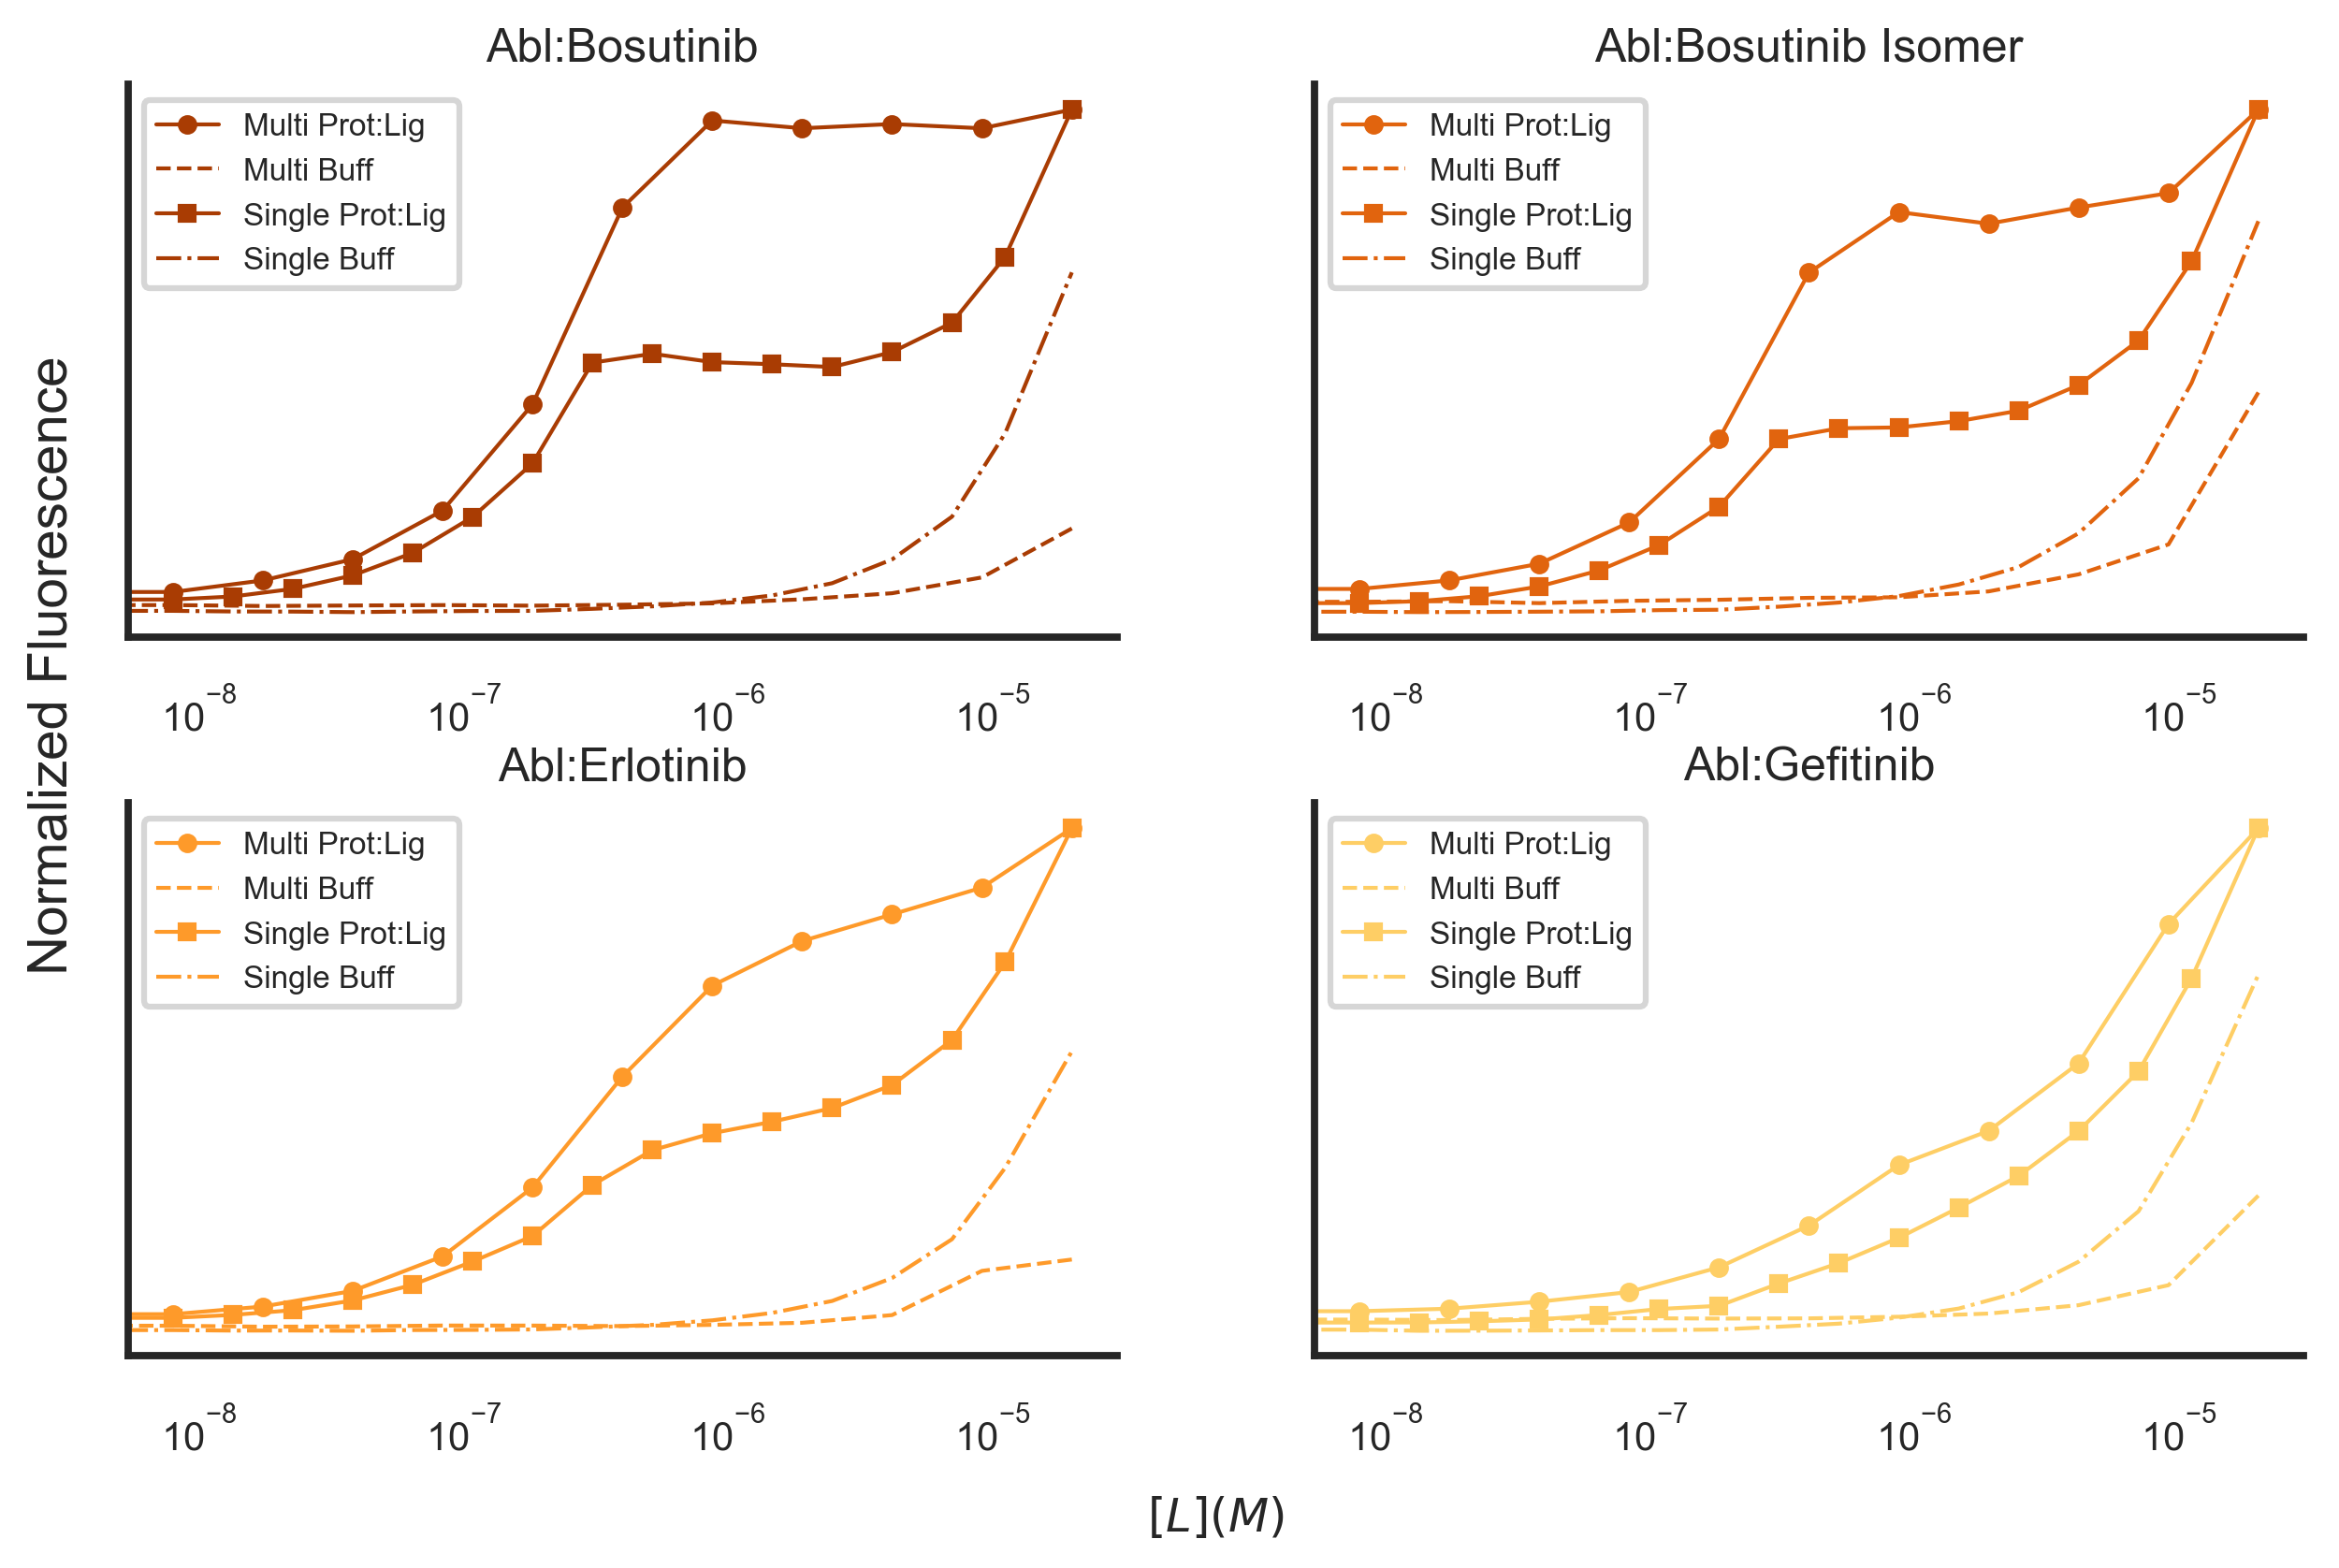

In [26]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Bosutinib-B1A2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=0, prot='Abl', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Bosutinib Isomer-D1C2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=1, prot='Abl', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Erlotinib-F1E2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=2, prot='Abl', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Normalized Fluorescence', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Gefitinib-H1G2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=3, prot='Abl', lig='Gefitinib')

plt.savefig('Abl_binding_curve_overlay.pdf')

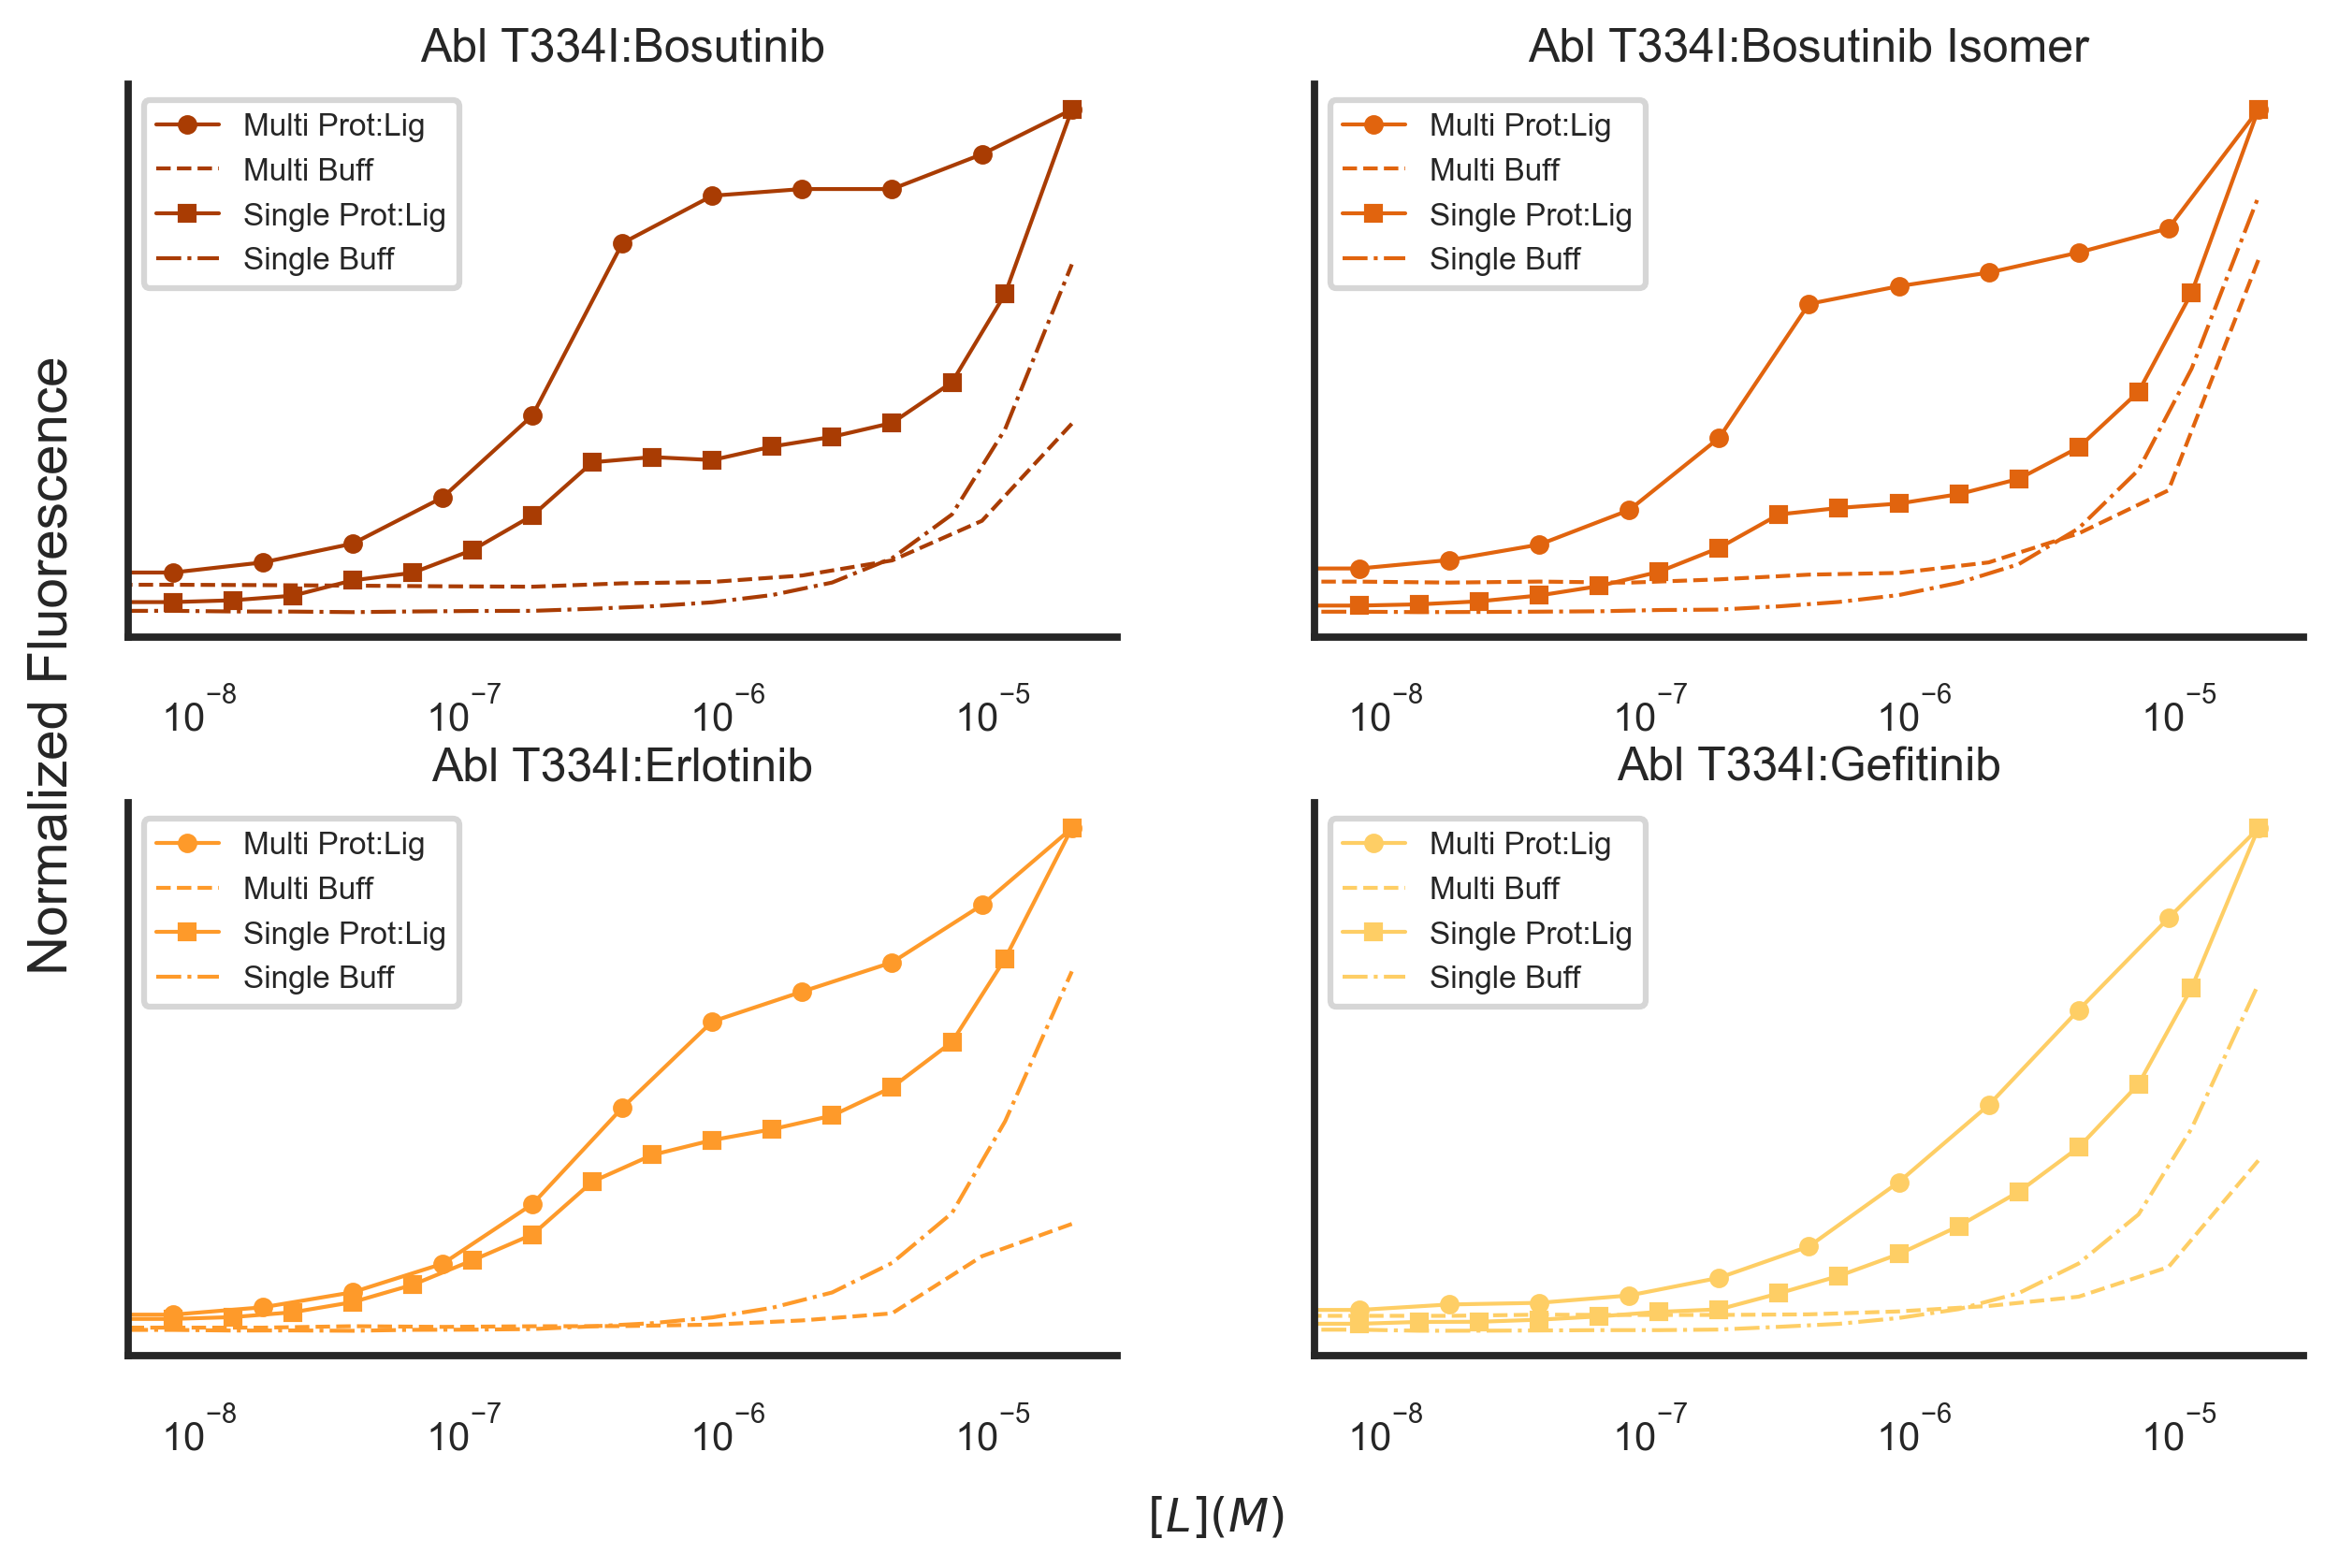

In [28]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Bosutinib-B4A2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=0, prot='Abl T334I', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Bosutinib Isomer-D4C2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=1, prot='Abl T334I', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Erlotinib-F4E2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=2, prot='Abl T334I', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Normalized Fluorescence', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Gefitinib-H4G2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=3, prot='Abl T334I', lig='Gefitinib')

plt.savefig('Abl_T334I_binding_curve_overlay.pdf')

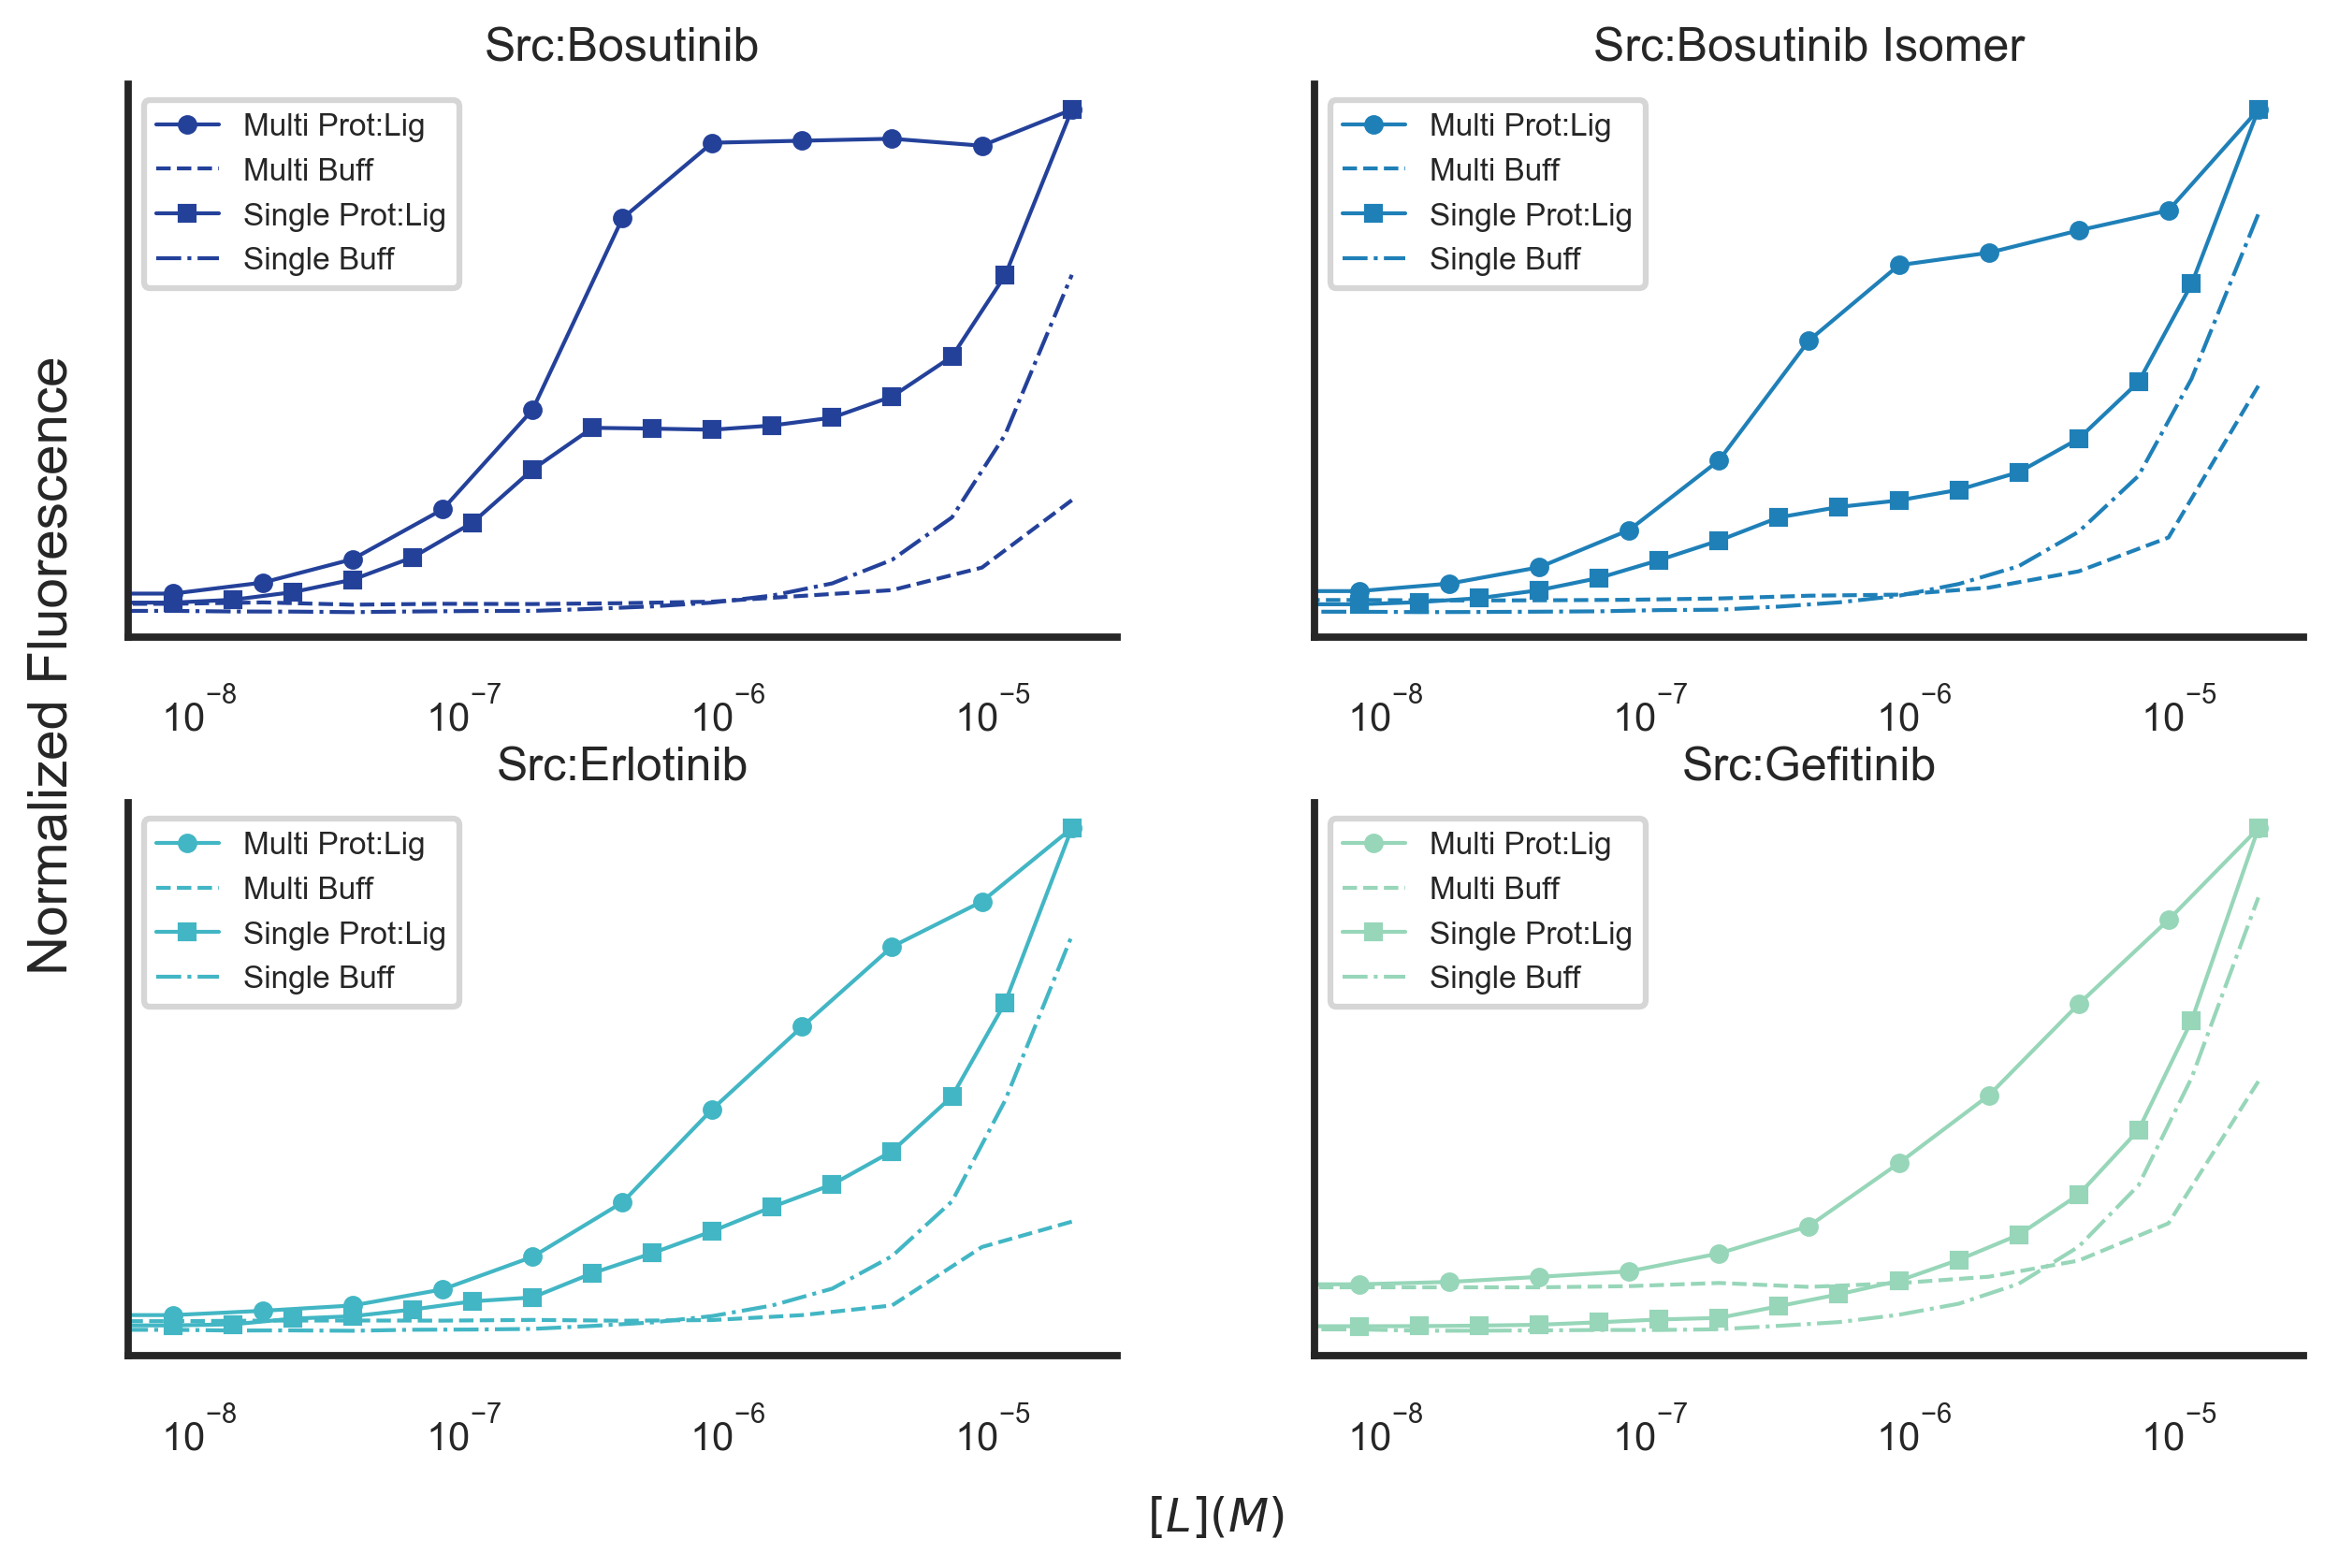

In [30]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Bosutinib-B7A2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=0, prot='Src', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Bosutinib Isomer-D7C2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=1, prot='Src', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Erlotinib-F7E2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=2, prot='Src', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Normalized Fluorescence', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Gefitinib-H7G2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=3, prot='Src', lig='Gefitinib')

plt.savefig('Src_binding_curve_overlay.pdf')

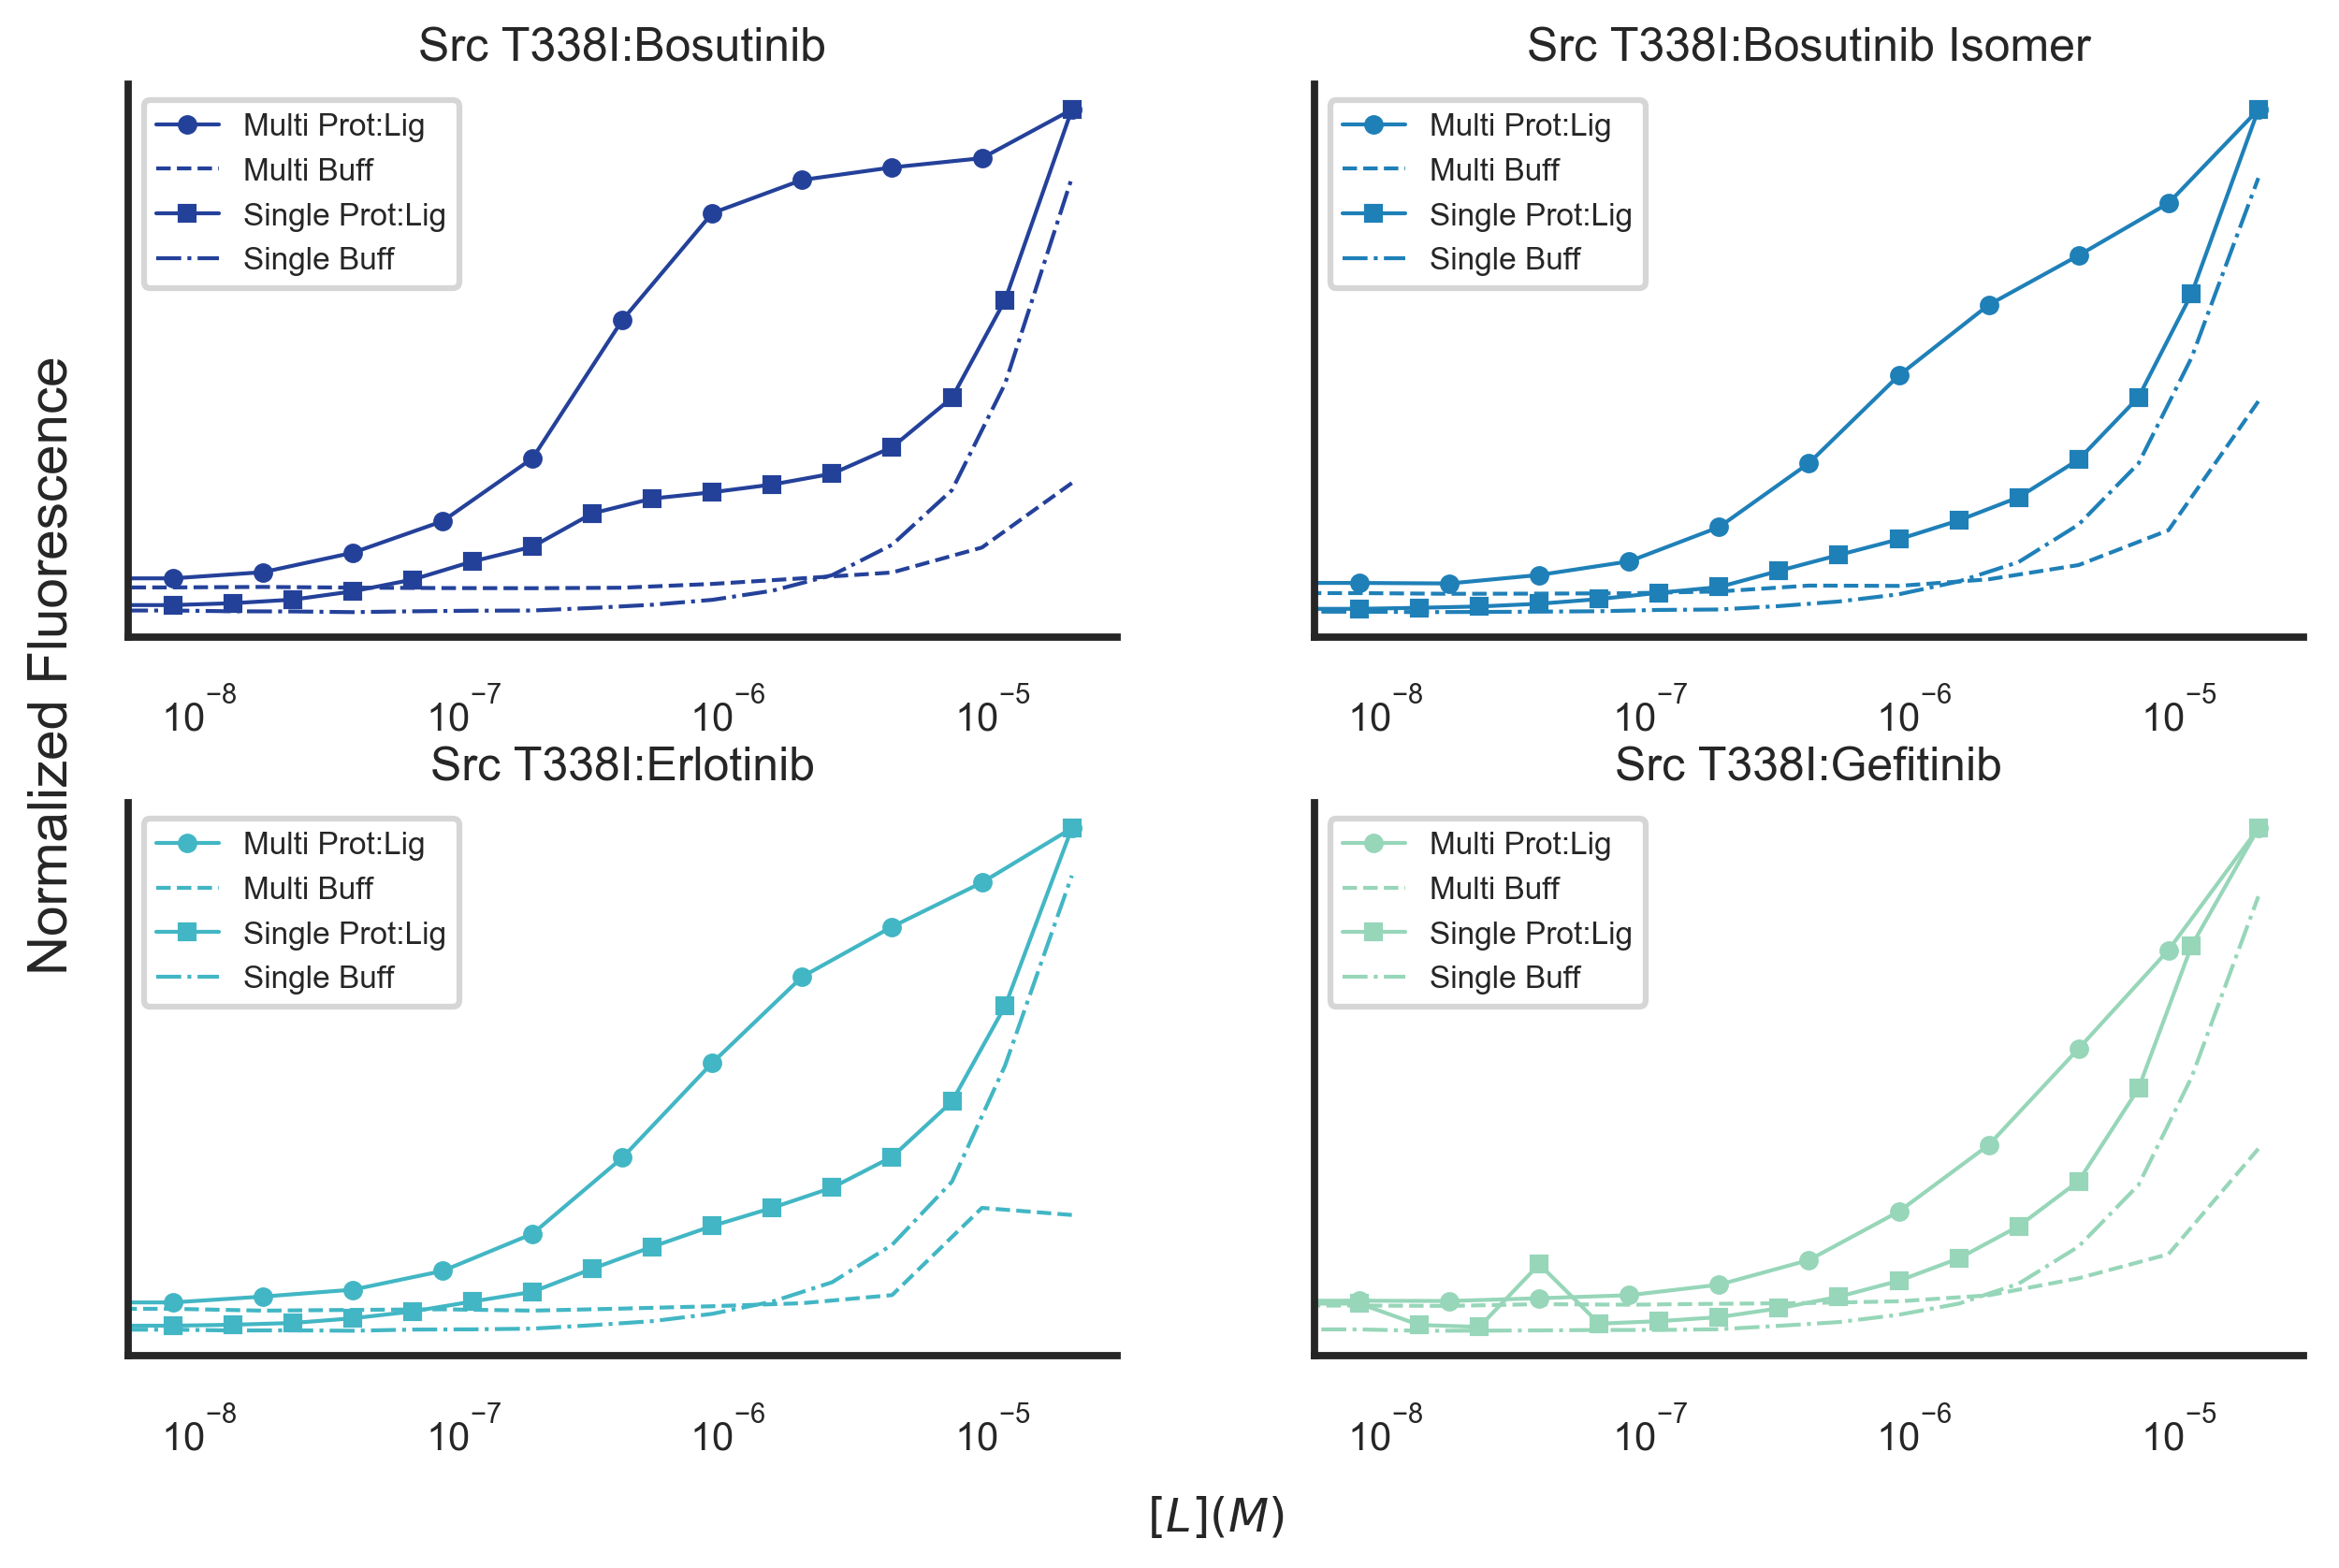

In [43]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Bosutinib-B10A2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=0, prot='Src T338I', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Bosutinib Isomer-D10C2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=1, prot='Src T338I', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Erlotinib-F10E2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=2, prot='Src T338I', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Normalized Fluorescence', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Gefitinib-H10G2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=3, prot='Src T338I', lig='Gefitinib')

plt.savefig('Src_T338I_binding_curve_overlay.pdf')

In [34]:
def plot_raw_overlay(color, inputs_multi, inputs_single, complex_fluo_multi, complex_multi, complex_fluo_single, complex_single, 
                 ligand_fluo_multi, ligand_fluo_single, i, prot, lig):
    
    cols = sns.color_palette('%s_r' % color, 5)

    plt.semilogx(inputs_multi['Lstated'],complex_fluo_multi[complex_multi],marker='o',markersize=4,linewidth=1,color=cols[i],label='Multi Prot:Lig')
    plt.semilogx(inputs_multi['Lstated'],ligand_fluo_multi[complex_multi],linestyle='--',linewidth=1,color=cols[i],label='Multi Buff')
    plt.semilogx(inputs_single['Lstated'],complex_fluo_single[complex_single],marker='s',markersize=4,linewidth=1,color=cols[i],label='Single Prot:Lig')
    plt.semilogx(inputs_single['Lstated'],ligand_fluo_single[complex_single],linestyle='-.',linewidth=1,color=cols[i], label='Single Buff')

    plt.title('%s:%s' %(prot,lig),fontsize=12)
    plt.yticks([])
    plt.xticks(fontsize=10)
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.legend(loc=2, fontsize=8)

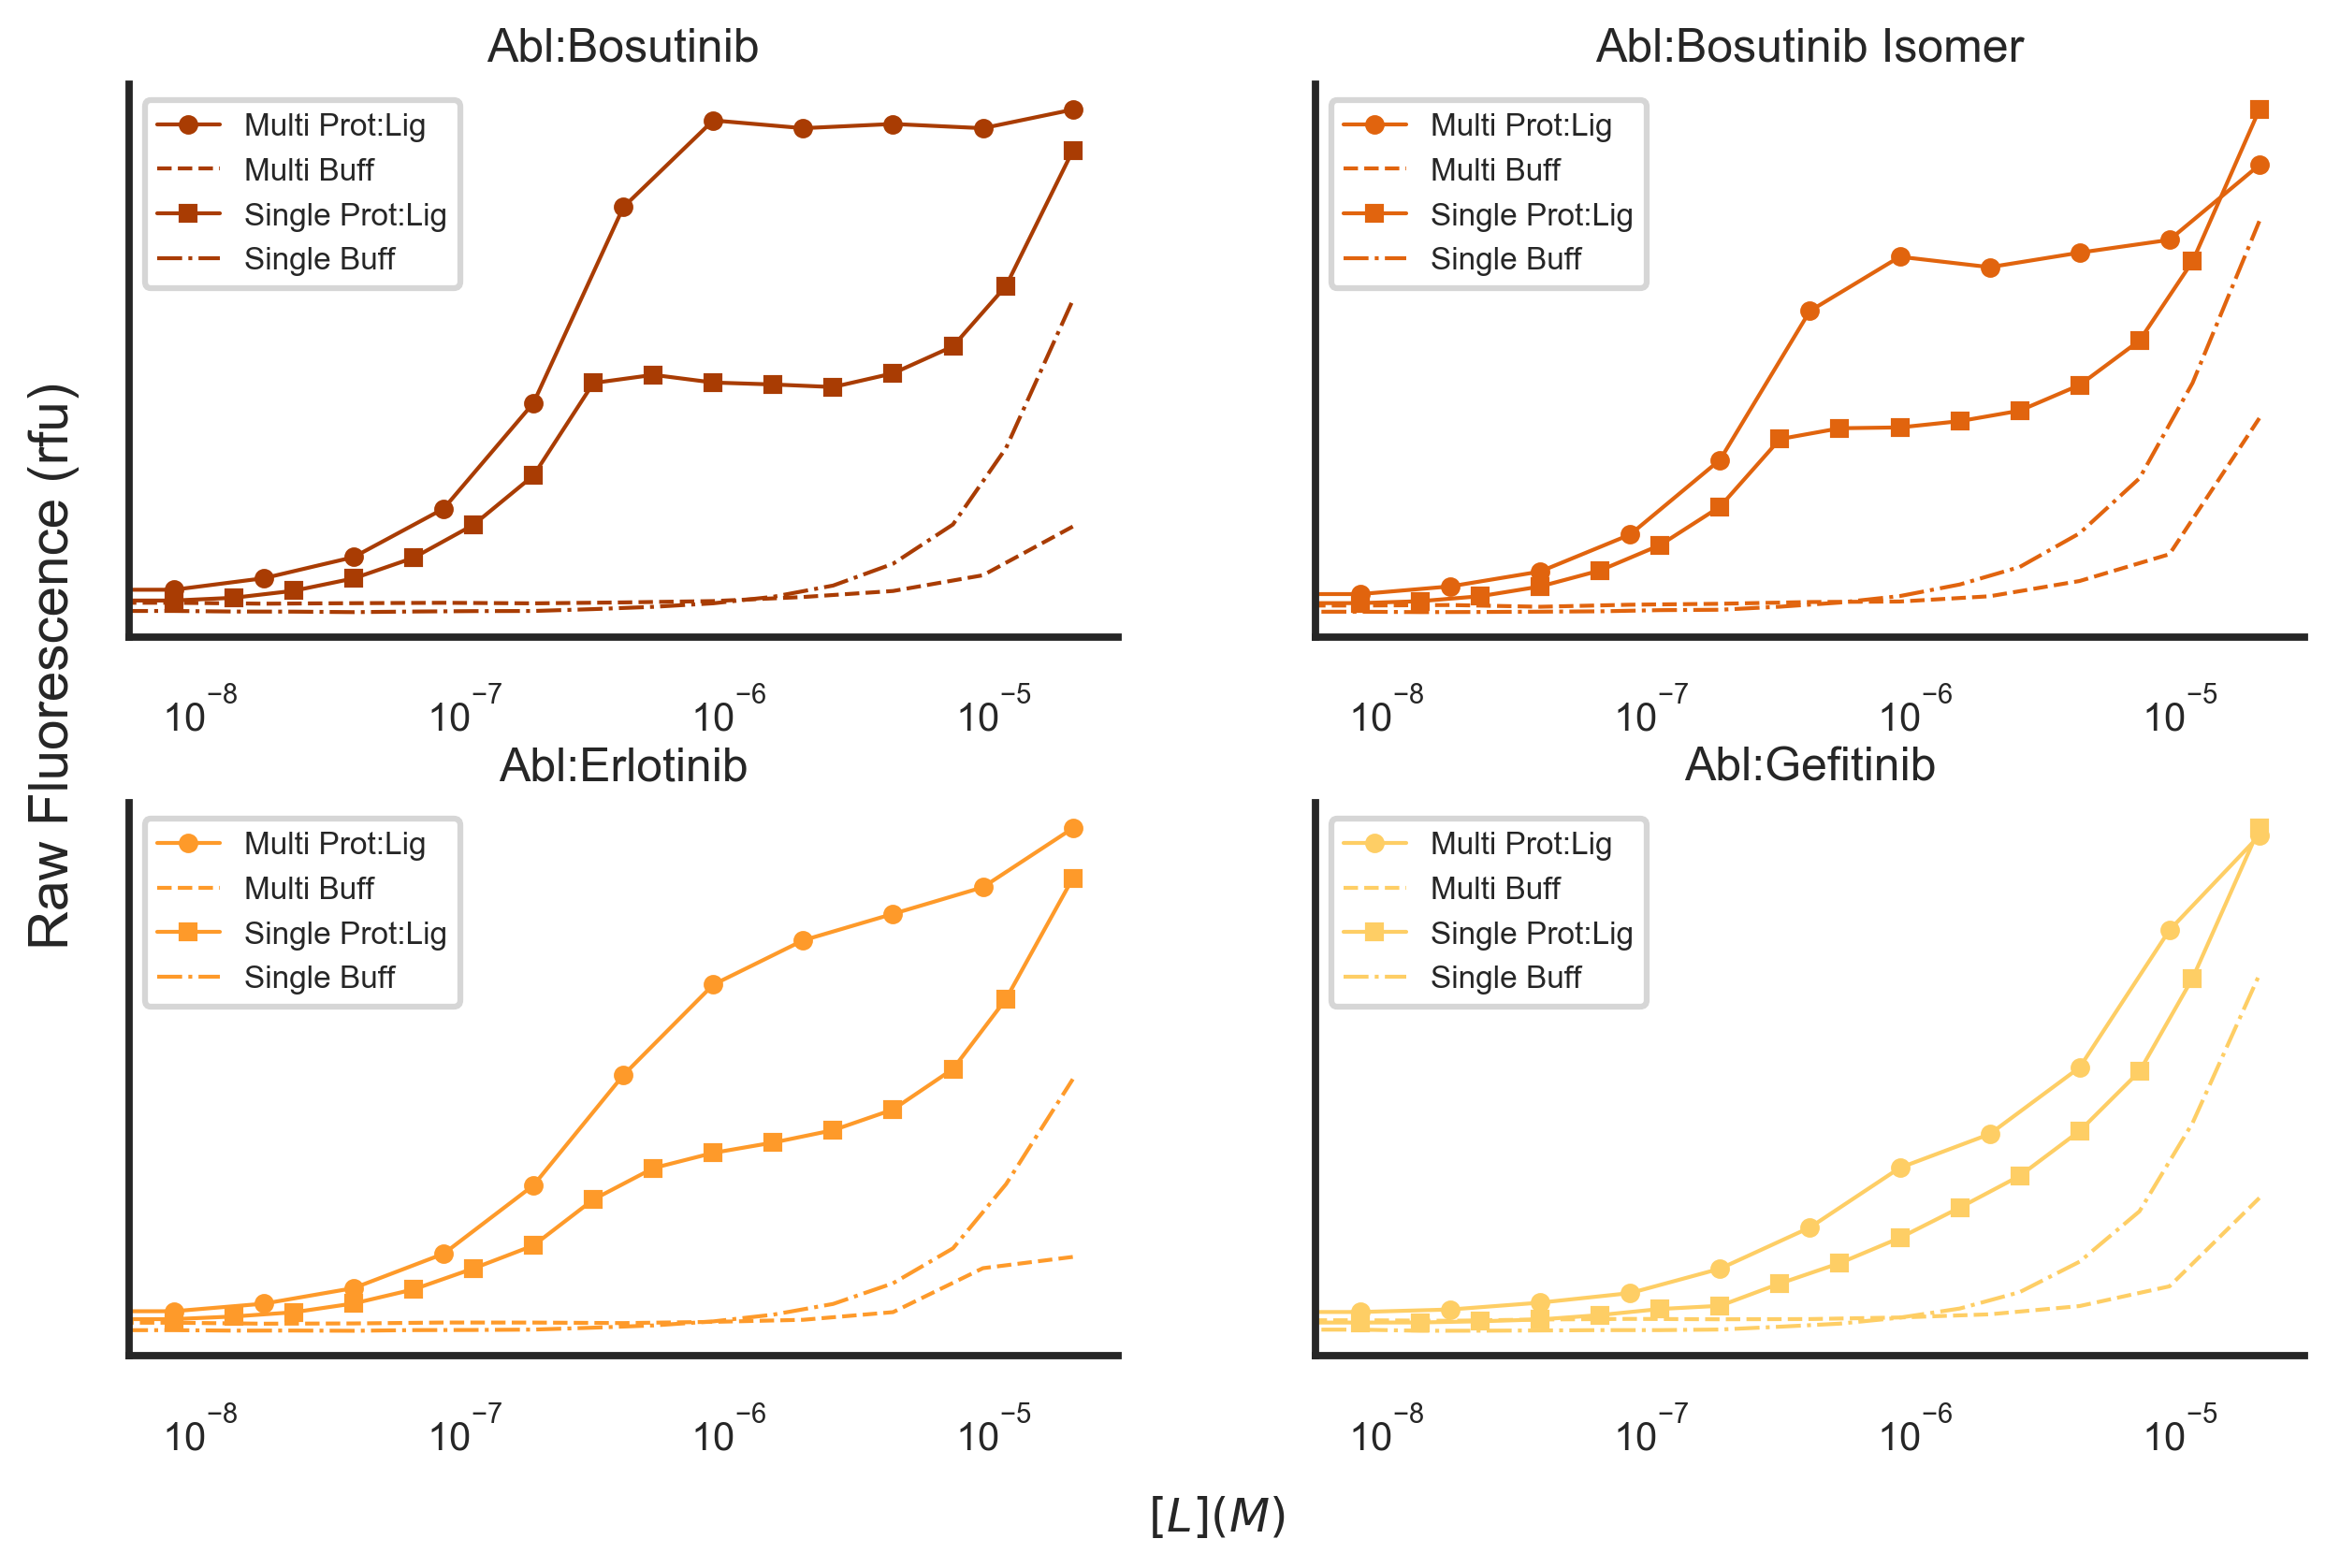

In [38]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Bosutinib-B1A2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=0, prot='Abl', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Bosutinib Isomer-D1C2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=1, prot='Abl', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Erlotinib-F1E2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=2, prot='Abl', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Raw Fluorescence (rfu)', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_multi, inputs_single=inputs_Abl_single, 
             complex_fluo_multi=complex_fluorescence_Abl_multi, complex_multi='Abl-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Abl_single, complex_single='Abl-Gefitinib-H1G2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_multi, ligand_fluo_single=ligand_fluorescence_Abl_single, 
             i=3, prot='Abl', lig='Gefitinib')

plt.savefig('Abl_raw_binding_curve_overlay.pdf')

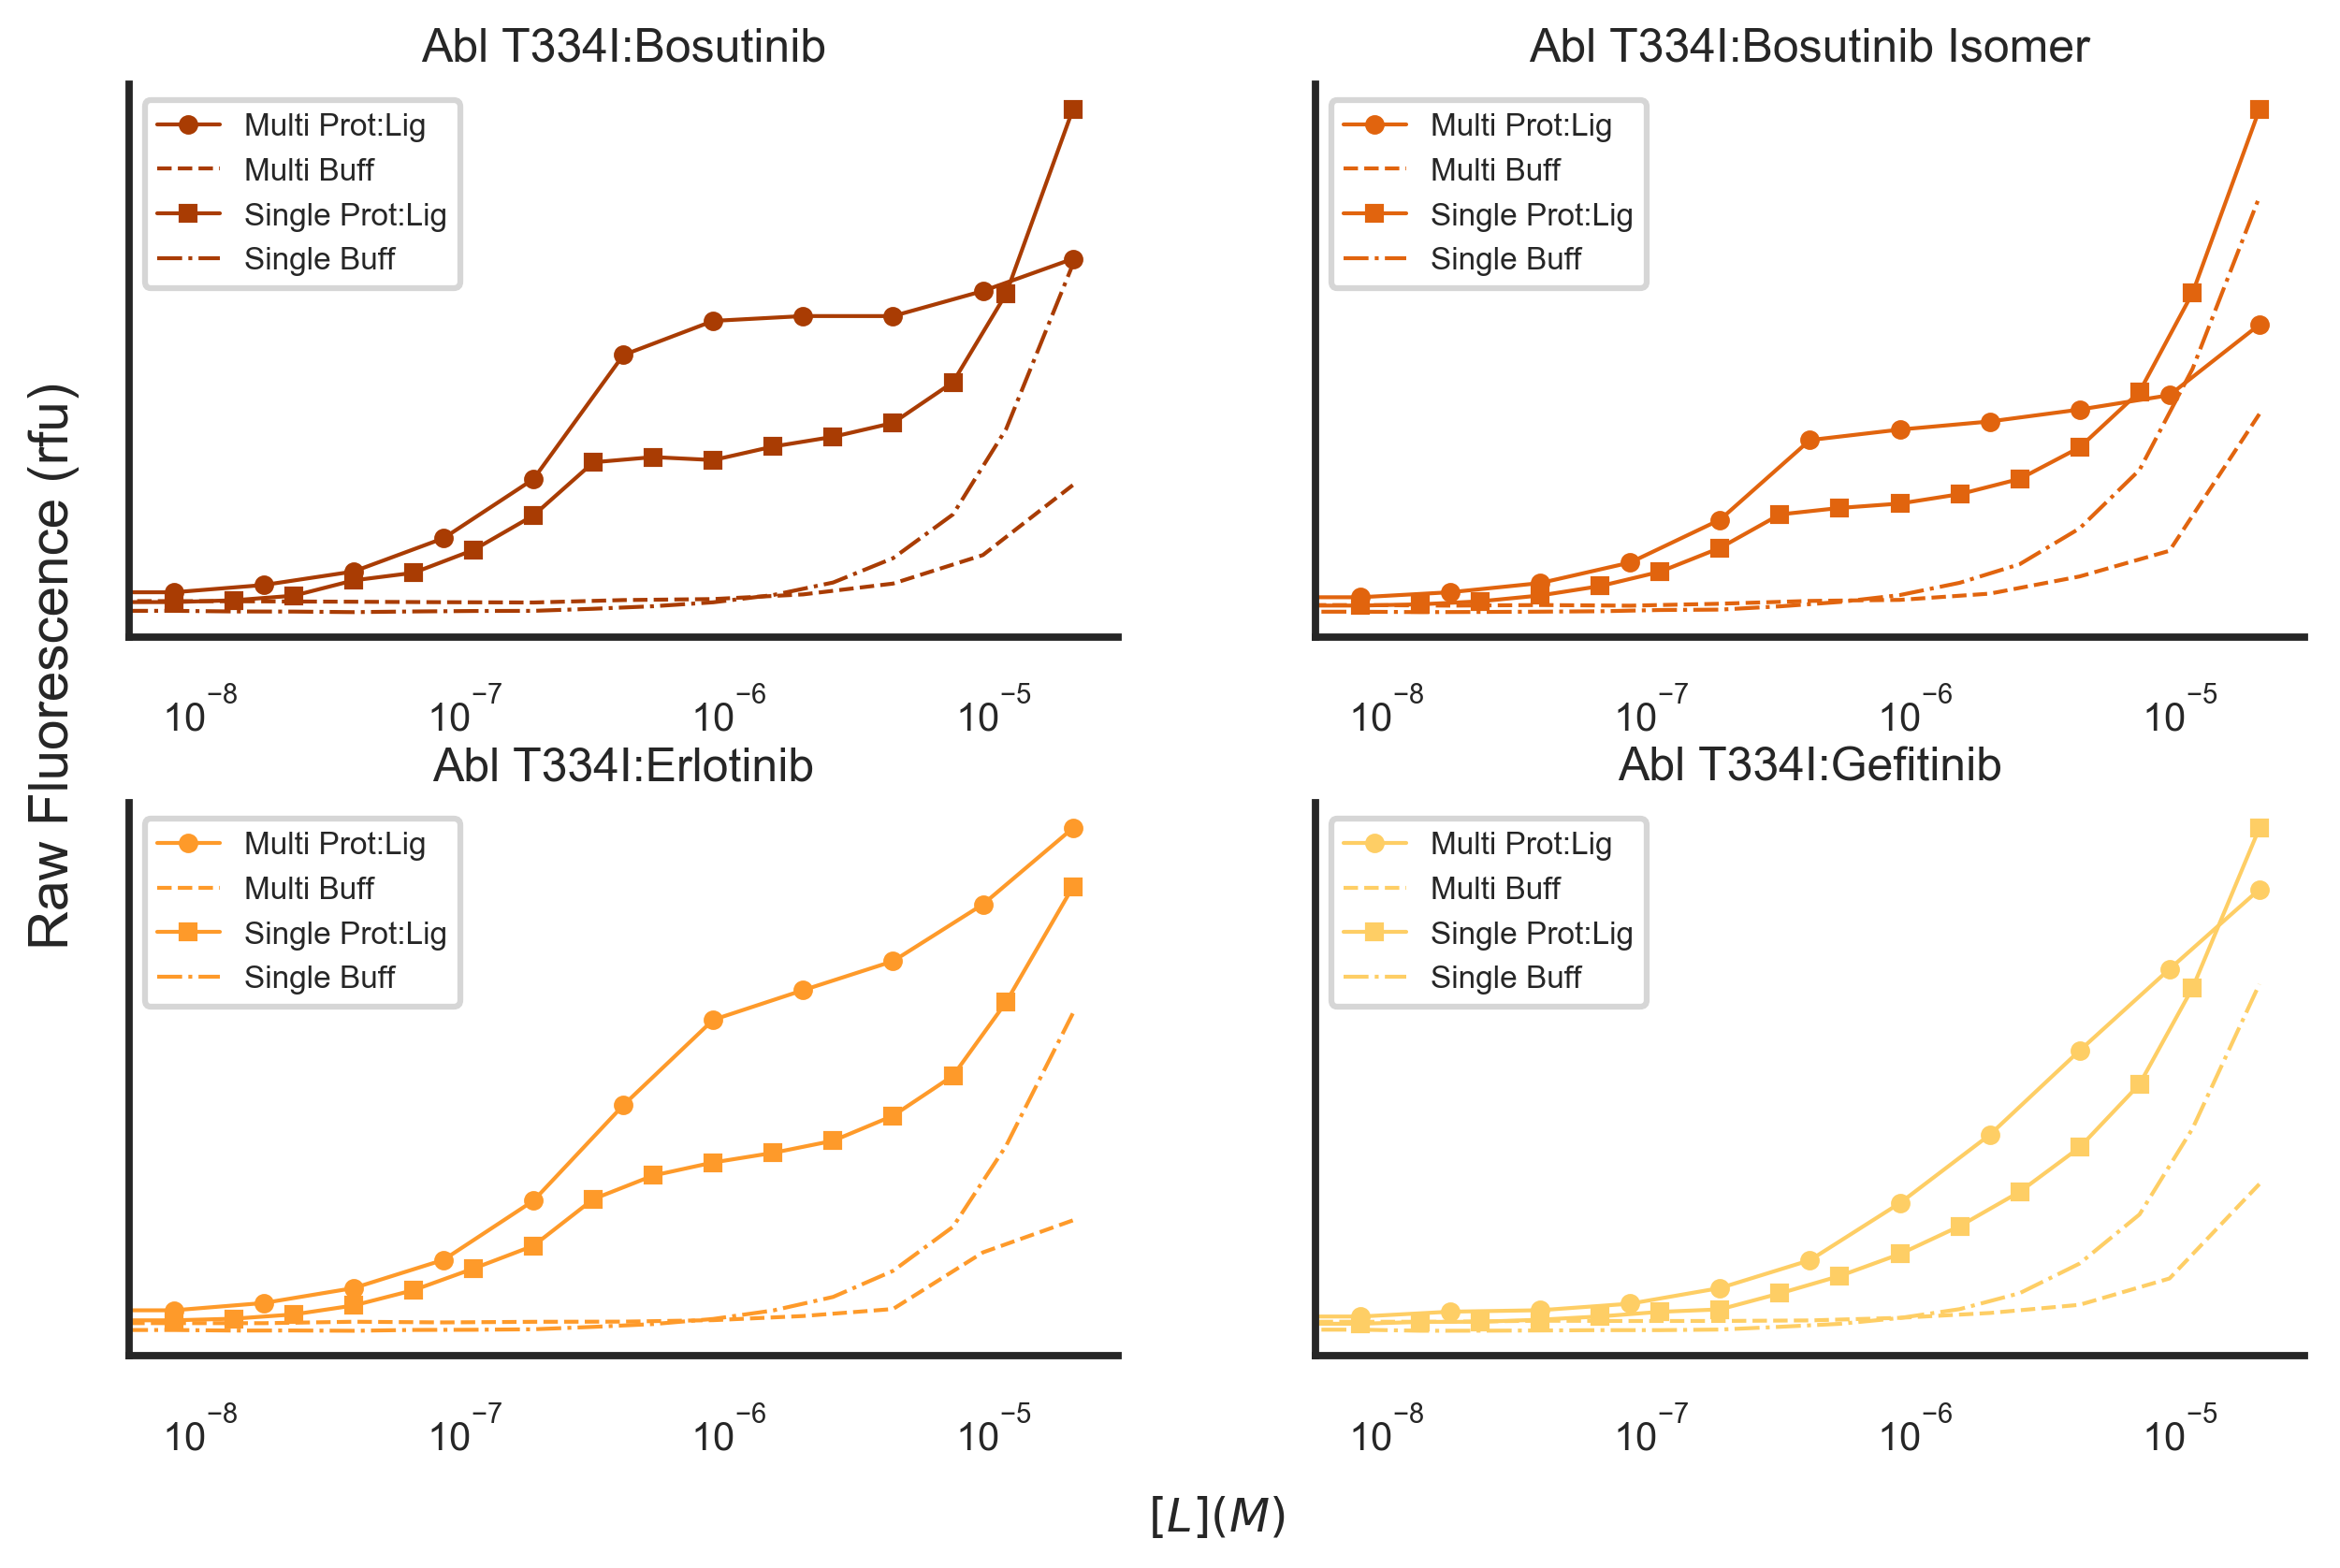

In [39]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Bosutinib-B4A2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=0, prot='Abl T334I', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Bosutinib Isomer-D4C2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=1, prot='Abl T334I', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Erlotinib-F4E2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=2, prot='Abl T334I', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Raw Fluorescence (rfu)', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_raw_overlay(color='YlOrBr', inputs_multi=inputs_Abl_T334I_multi, inputs_single=inputs_Abl_T334I_single, 
             complex_fluo_multi=complex_fluorescence_Abl_T334I_multi, complex_multi='Abl T334I-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Abl_T334I_single, complex_single='Abl T334I-Gefitinib-H4G2', 
             ligand_fluo_multi=ligand_fluorescence_Abl_T334I_multi, ligand_fluo_single=ligand_fluorescence_Abl_T334I_single, 
             i=3, prot='Abl T334I', lig='Gefitinib')

plt.savefig('Abl_T334I_raw_binding_curve_overlay.pdf')

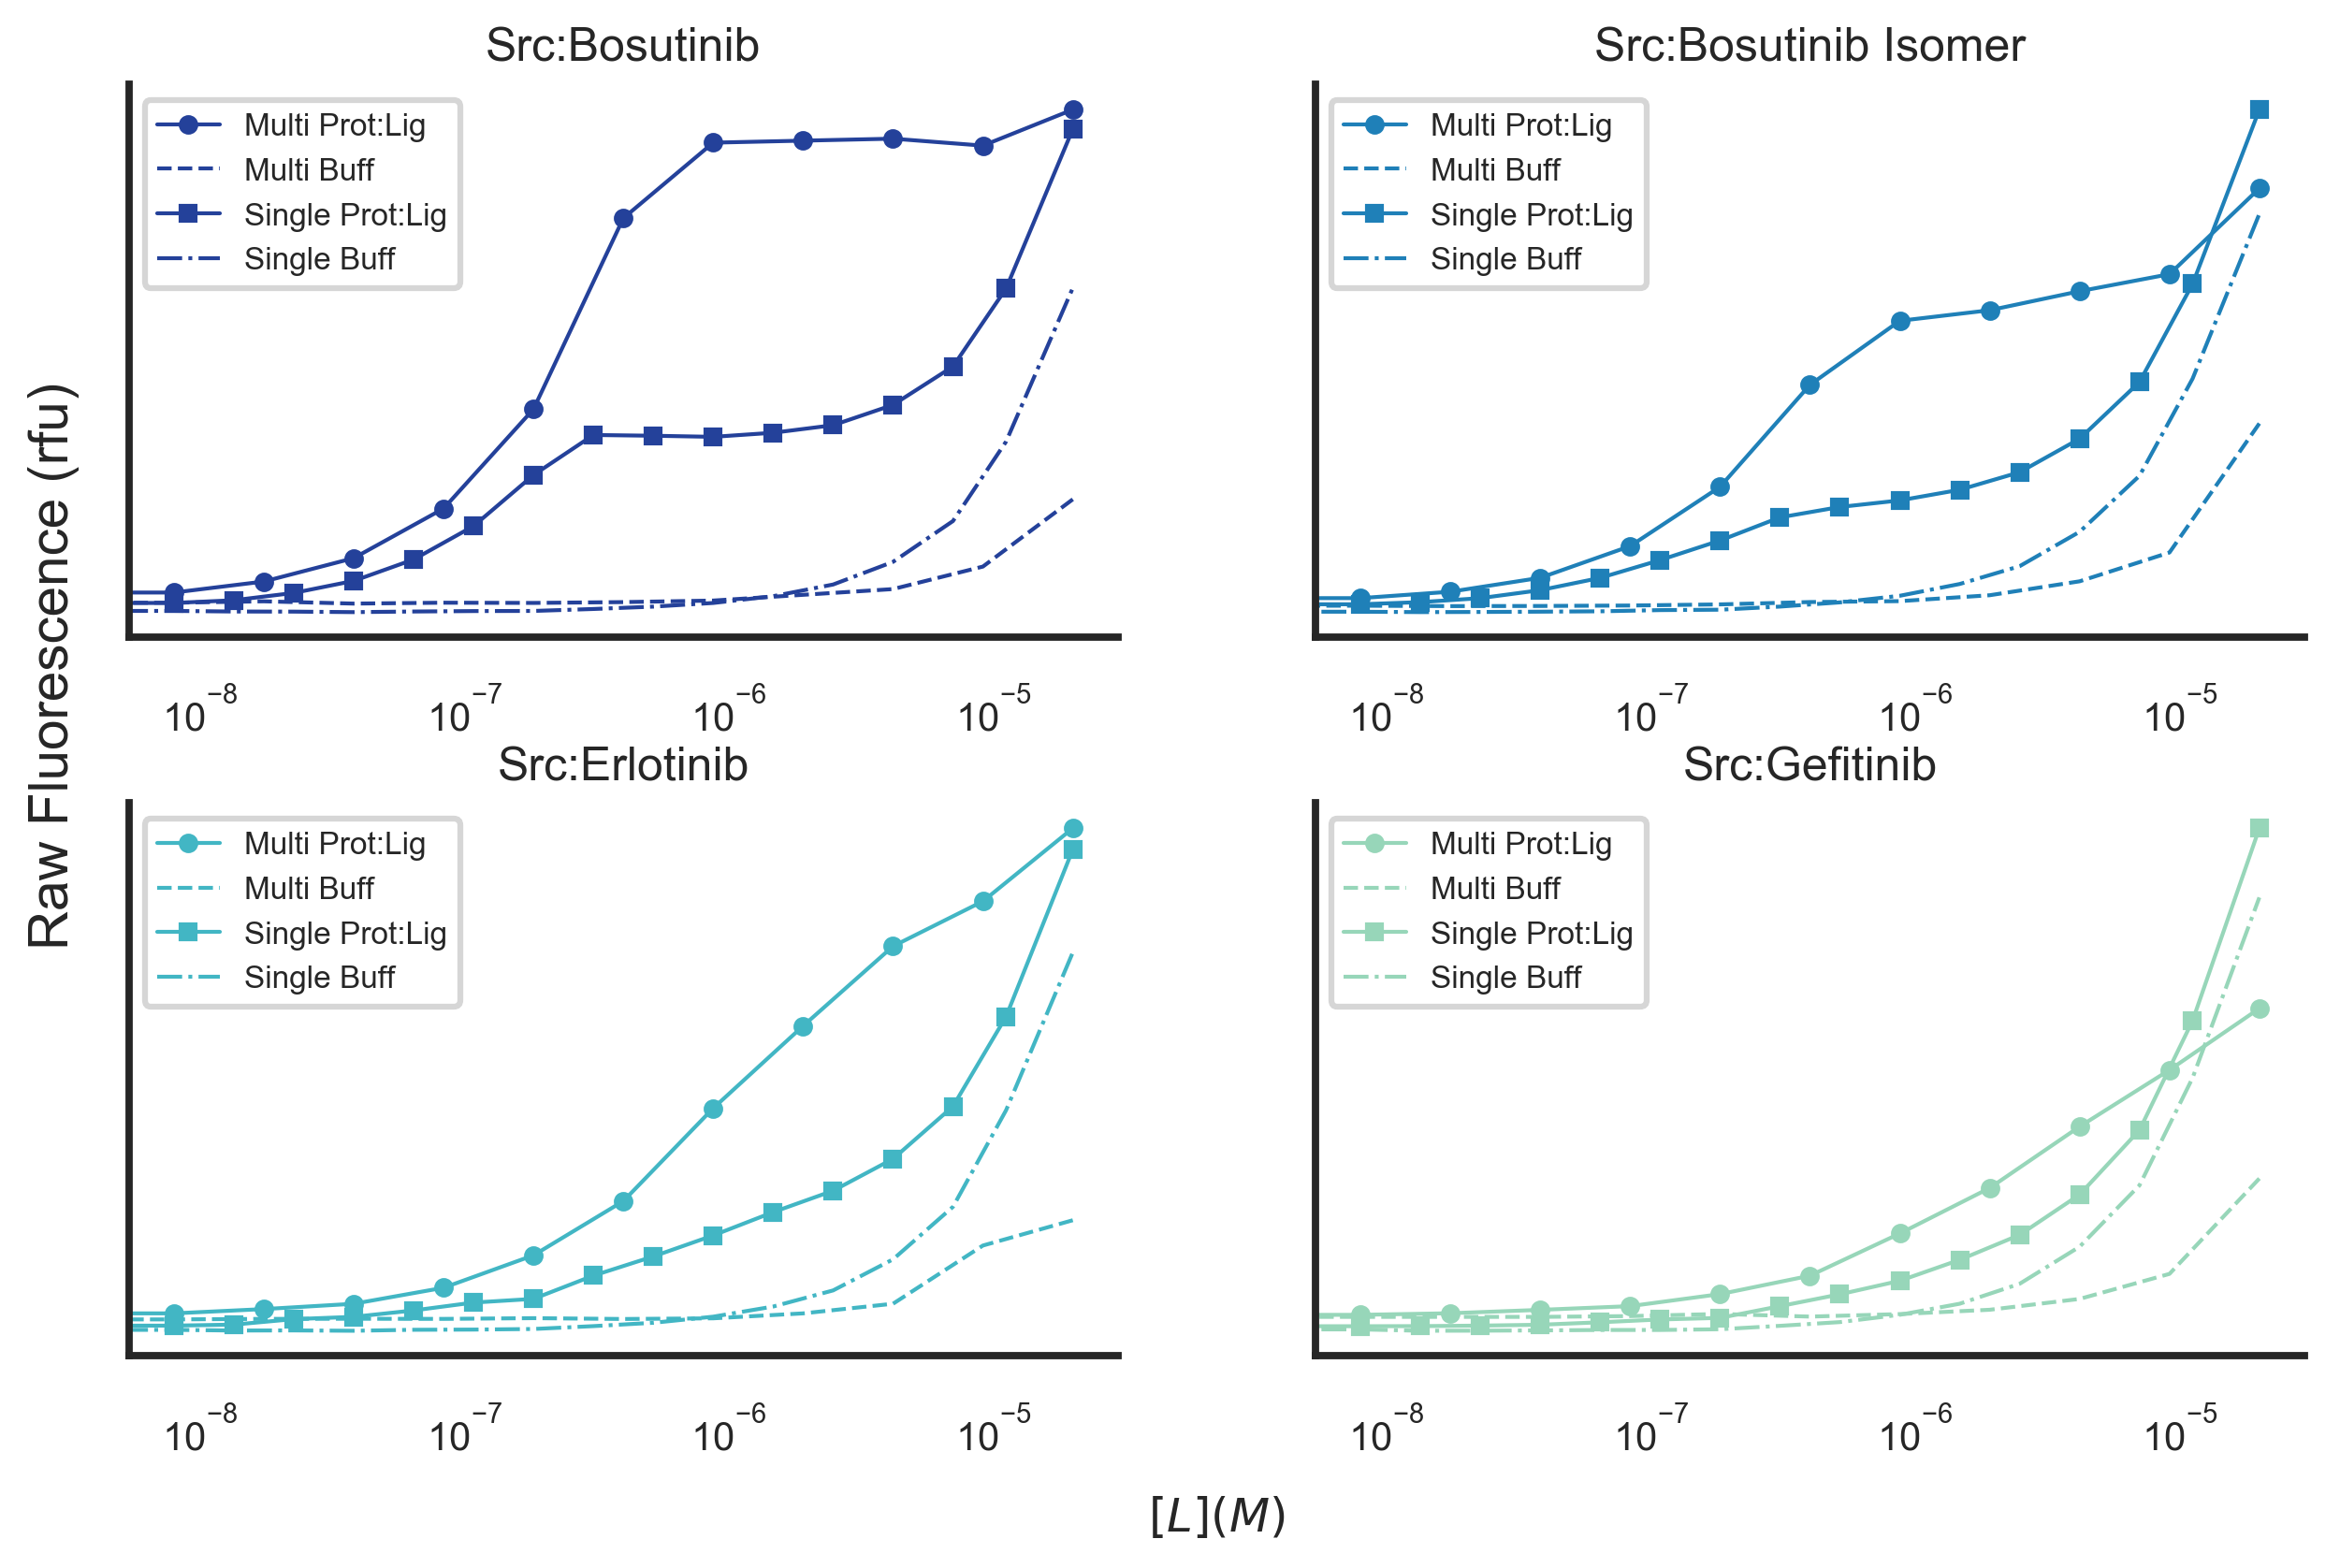

In [40]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Bosutinib-B7A2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=0, prot='Src', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Bosutinib Isomer-D7C2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=1, prot='Src', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Erlotinib-F7E2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=2, prot='Src', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Raw Fluorescence (rfu)', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_multi, inputs_single=inputs_Src_single, 
             complex_fluo_multi=complex_fluorescence_Src_multi, complex_multi='Src-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Src_single, complex_single='Src-Gefitinib-H7G2', 
             ligand_fluo_multi=ligand_fluorescence_Src_multi, ligand_fluo_single=ligand_fluorescence_Src_single, 
             i=3, prot='Src', lig='Gefitinib')

plt.savefig('Src_raw_binding_curve_overlay.pdf')

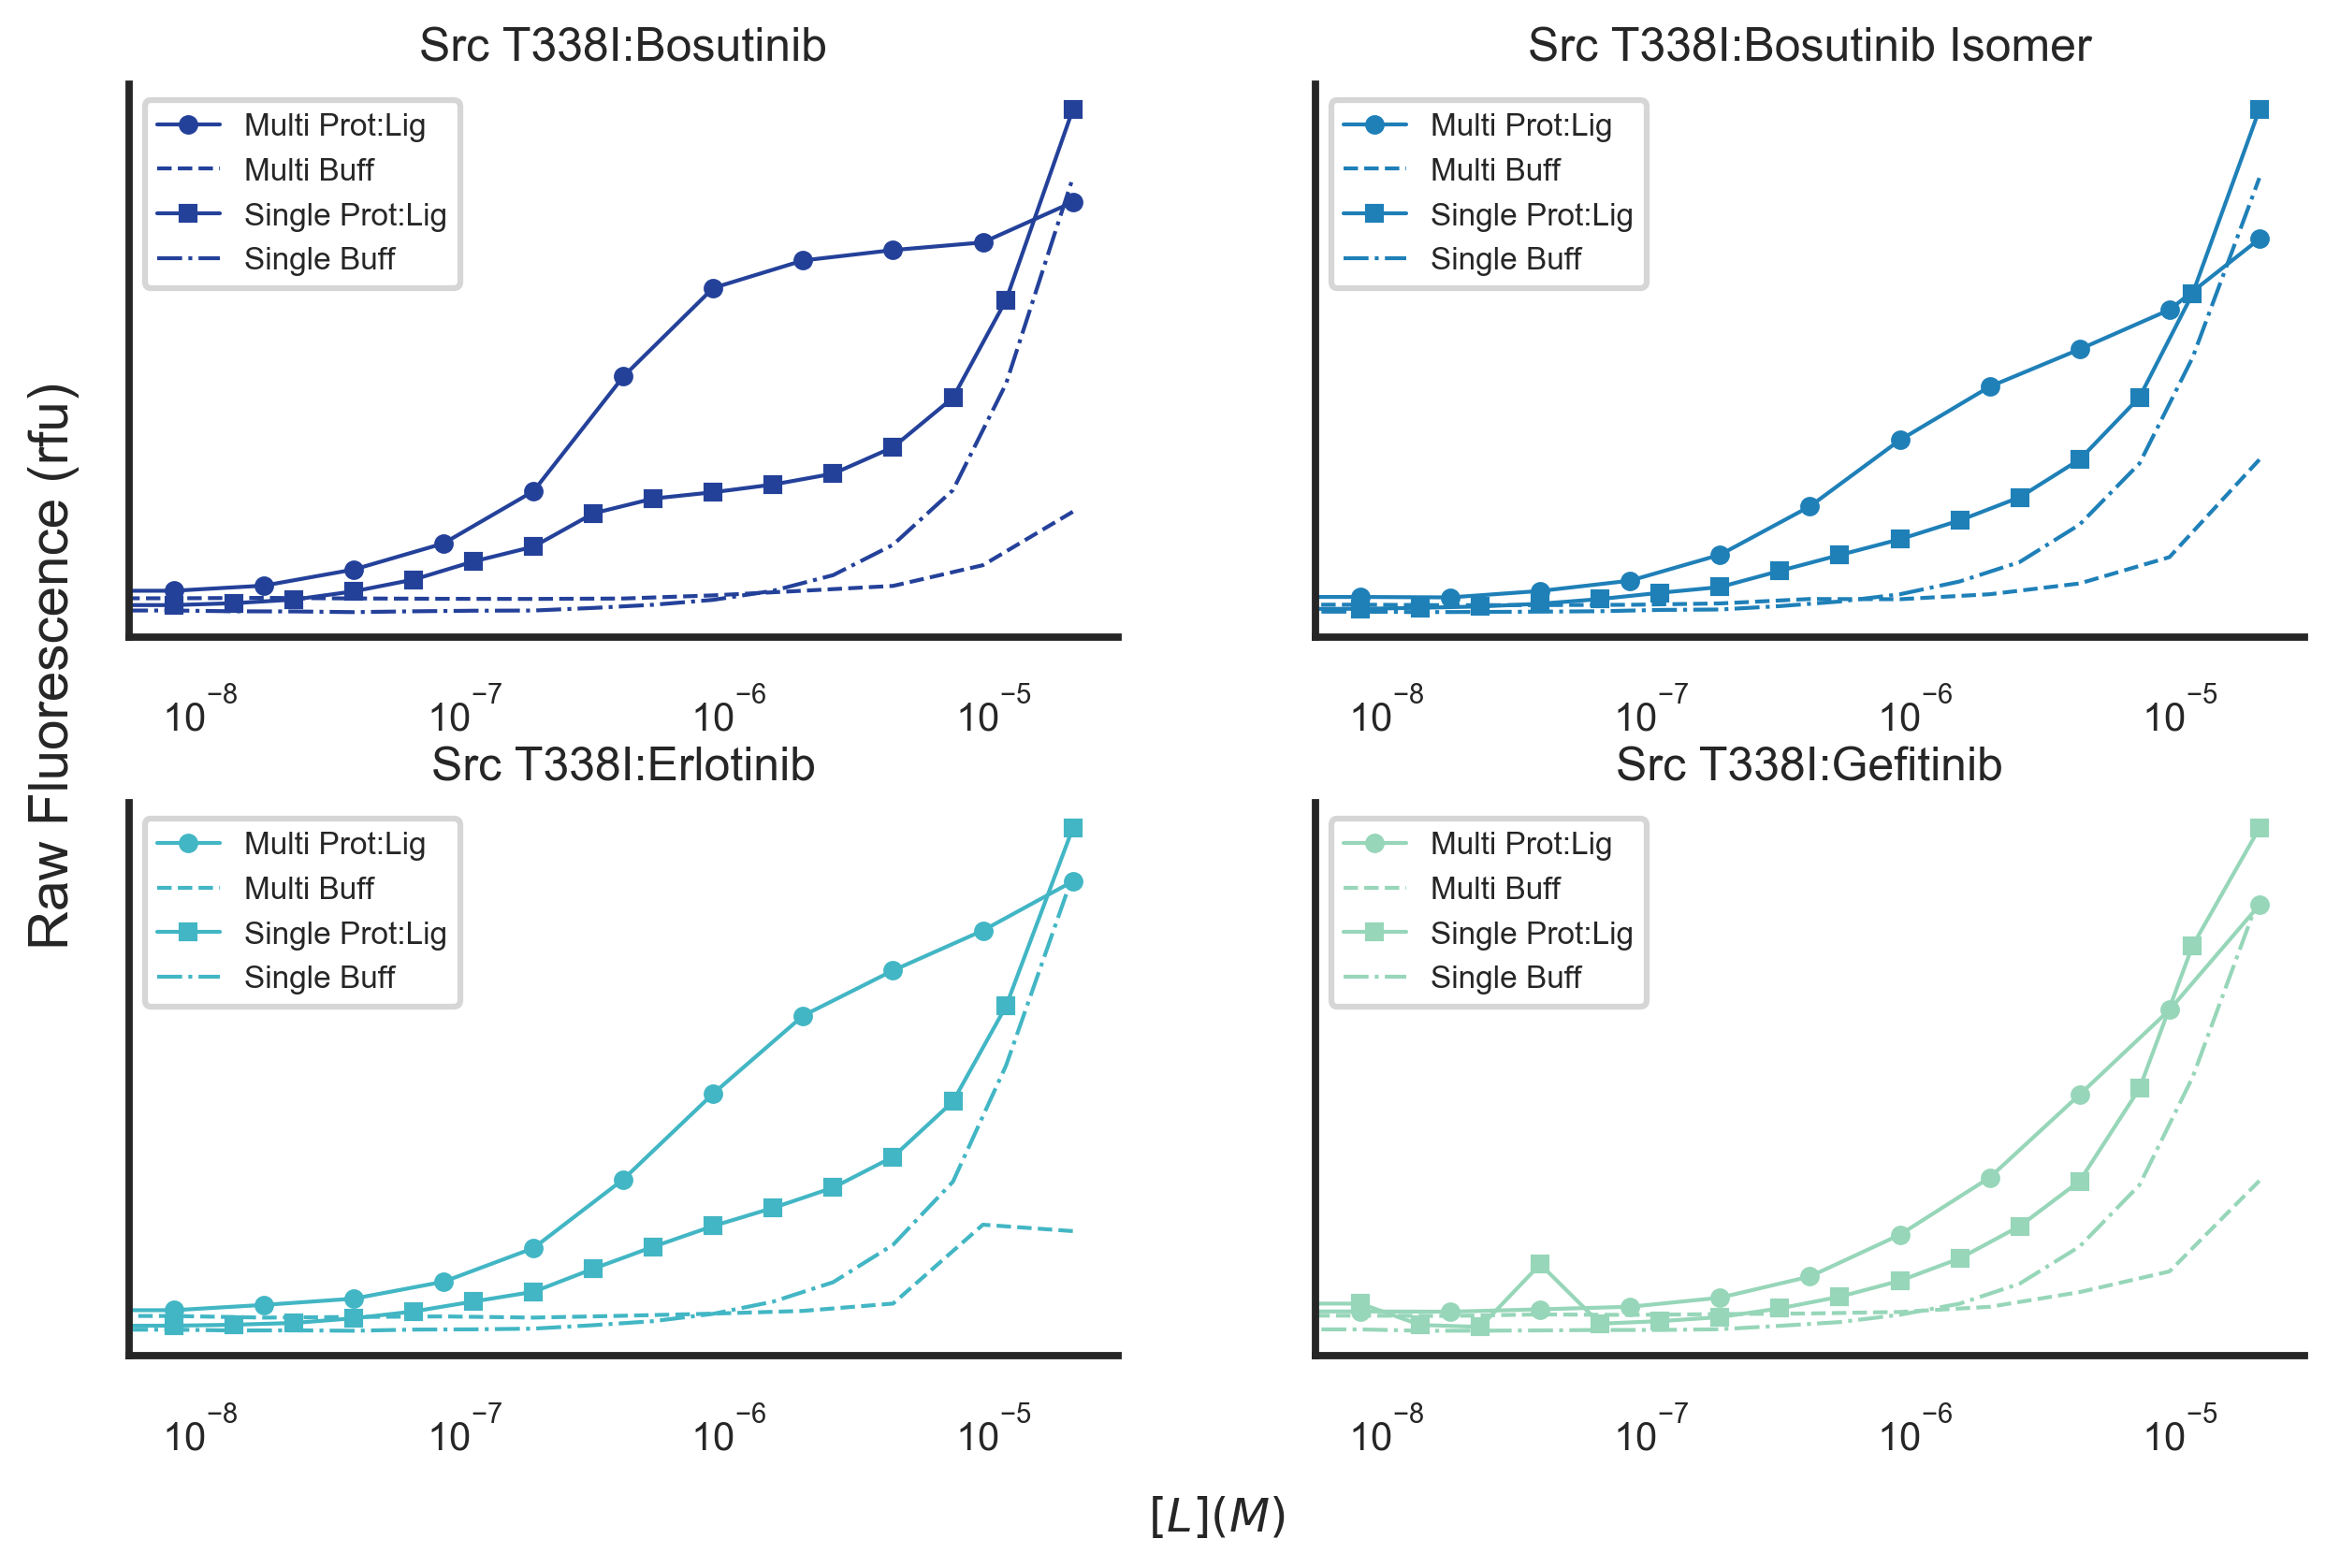

In [42]:
fig = plt.figure(figsize=(10,6), dpi=300)

plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2,2,1)
bos = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Bosutinib-AB', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Bosutinib-B10A2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=0, prot='Src T338I', lig='Bosutinib')

ax1 = fig.add_subplot(2,2,2)
bos_iso = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Bosutinib Isomer-CD', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Bosutinib Isomer-D10C2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=1, prot='Src T338I', lig='Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)
erl = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Erlotinib-EF', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Erlotinib-F10E2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=2, prot='Src T338I', lig='Erlotinib')

axis = plt.gca()
plt.ylabel('Raw Fluorescence (rfu)', fontsize=14)
axis.yaxis.set_label_coords(-0.05,1.25)
plt.xlabel('$[L] (M)$', fontsize=12)
axis.xaxis.set_label_coords(1.1,-0.25)

ax1 = fig.add_subplot(2,2,4)
gef = plot_raw_overlay(color='YlGnBu', inputs_multi=inputs_Src_T338I_multi, inputs_single=inputs_Src_T338I_single, 
             complex_fluo_multi=complex_fluorescence_Src_T338I_multi, complex_multi='Src T338I-Gefitinib-GH', 
             complex_fluo_single=complex_fluorescence_Src_T338I_single, complex_single='Src T338I-Gefitinib-H10G2', 
             ligand_fluo_multi=ligand_fluorescence_Src_T338I_multi, ligand_fluo_single=ligand_fluorescence_Src_T338I_single, 
             i=3, prot='Src T338I', lig='Gefitinib')

plt.savefig('Src_T338I_raw_binding_curve_overlay.pdf')